# Time Series Forecasting - M5 Accuracy Competition - NBEATS & TFT 📈🗓️💸

## Aportes de integrantes
| Integrante       | Aporte           |
| ------------- |:-------------:| 
| Alvaro Felipe Pupuche Morales      | Intento de LSTM|
| André Giancarlo La Torre Peña     | Intento de TFT, Métricas, Edición de video|
| Micaela Davies Cotlear | Intento de LSTM, Justificación de variables, Bibliografía  |
| Rodrigo Sánchez Bautista | NBEATS, TFT, Investigación para la experimentación y mejoras, Demás|


## Link de folder de Drive 🗃️
https://drive.google.com/drive/folders/1ziNa4HGp-yR5hVwzJDzfY61G3oMaNsji?usp=sharing

## Importando librerías 📚

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import anderson

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Carga de archivos y recordatorio de la información 📂

In [ ]:
cal = pd.read_csv('/content/drive/MyDrive/IRN Project G1 2022/Original files/calendar.csv')
stv = pd.read_csv('/content/drive/MyDrive/IRN Project G1 2022/Original files/sales_train_validation.csv')
ss = pd.read_csv('/content/drive/MyDrive/IRN Project G1 2022/Original files/sample_submission.csv')
sellp = pd.read_csv('/content/drive/MyDrive/IRN Project G1 2022/Original files/sell_prices.csv')
stev = pd.read_csv('/content/drive/MyDrive/IRN Project G1 2022/Original files/sales_train_evaluation.csv')

#### 1. File: `calendar.csv`


In [ ]:
cal

date  wm_yr_wk    weekday  wday  month  year       d  \
0     2011-01-29     11101   Saturday     1      1  2011     d_1   
1     2011-01-30     11101     Sunday     2      1  2011     d_2   
2     2011-01-31     11101     Monday     3      1  2011     d_3   
3     2011-02-01     11101    Tuesday     4      2  2011     d_4   
4     2011-02-02     11101  Wednesday     5      2  2011     d_5   
...          ...       ...        ...   ...    ...   ...     ...   
1964  2016-06-15     11620  Wednesday     5      6  2016  d_1965   
1965  2016-06-16     11620   Thursday     6      6  2016  d_1966   
1966  2016-06-17     11620     Friday     7      6  2016  d_1967   
1967  2016-06-18     11621   Saturday     1      6  2016  d_1968   
1968  2016-06-19     11621     Sunday     2      6  2016  d_1969   

      event_name_1 event_type_1  event_name_2 event_type_2  snap_CA  snap_TX  \
0              NaN          NaN           NaN          NaN        0        0   
1              NaN          NaN           NaN          NaN        0        0   
2              NaN          NaN           NaN          NaN        0        0   
3              NaN          NaN           NaN          NaN        1        1   
4              NaN          NaN           NaN          NaN        1        0   
...            ...          ...           ...          ...      ...      ...   
1964           NaN          NaN           NaN          NaN        0        1   
1965           NaN          NaN           NaN          NaN        0        0   
1966           NaN          NaN           NaN          NaN        0        0   
1967           NaN          NaN           NaN          NaN        0        0   
1968  NBAFinalsEnd     Sporting  Father's day     Cultural        0        0   

      snap_WI  
0           0  
1           0  
2           0  
3           0  
4           1  
...       ...  
1964        1  
1965        0  
1966        0  
1967        0  
1968        0  

[1969 rows x 14 columns]

#### File: `sales_train_validation.csv`

In [ ]:
stv

id        item_id    dept_id   cat_id  \
0      HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1      HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2      HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3      HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
4      HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                              ...            ...        ...      ...   
30485    FOODS_3_823_WI_3_validation    FOODS_3_823    FOODS_3    FOODS   
30486    FOODS_3_824_WI_3_validation    FOODS_3_824    FOODS_3    FOODS   
30487    FOODS_3_825_WI_3_validation    FOODS_3_825    FOODS_3    FOODS   
30488    FOODS_3_826_WI_3_validation    FOODS_3_826    FOODS_3    FOODS   
30489    FOODS_3_827_WI_3_validation    FOODS_3_827    FOODS_3    FOODS   

      store_id state_id  d_1  d_2  d_3  d_4  ...  d_1904  d_1905  d_1906  \
0         CA_1       CA    0    0    0    0  ...       1       3       0   
1         CA_1       CA    0    0    0    0  ...       0       0       0   
2         CA_1       CA    0    0    0    0  ...       2       1       2   
3         CA_1       CA    0    0    0    0  ...       1       0       5   
4         CA_1       CA    0    0    0    0  ...       2       1       1   
...        ...      ...  ...  ...  ...  ...  ...     ...     ...     ...   
30485     WI_3       WI    0    0    2    2  ...       2       0       0   
30486     WI_3       WI    0    0    0    0  ...       0       0       0   
30487     WI_3       WI    0    6    0    2  ...       2       1       0   
30488     WI_3       WI    0    0    0    0  ...       0       0       1   
30489     WI_3       WI    0    0    0    0  ...       0       0       0   

       d_1907  d_1908  d_1909  d_1910  d_1911  d_1912  d_1913  
0           1       1       1       3       0       1       1  
1           0       0       1       0       0       0       0  
2           1       1       1       0       1       1       1  
3           4       1       0       1       3       7       2  
4           0       1       1       2       2       2       4  
...       ...     ...     ...     ...     ...     ...     ...  
30485       0       0       0       1       0       0       1  
30486       0       0       0       0       0       1       0  
30487       2       0       1       0       0       1       0  
30488       0       0       1       0       3       1       3  
30489       0       0       0       0       0       0       0  

[30490 rows x 1919 columns]

Recordemos que: 
* Son tres estados: California (CA), Texas (TX) y Wisconsin (WI) .
* Hay 3 tiendas por cada estado de Texas(TX) y Wisconsin (WI), hay 4 tiendas en California (CA).
* Se venden los 3049 mismos productos en cada una de las 10 tiendas.

In [ ]:
stv['store_id'].unique()

array(['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1',
       'WI_2', 'WI_3'], dtype=object)

#### File: `sales_train_evaluation.csv`

En este archivo tenemos las ventas de todos los productos vendidos a los largo del día `d_1` hasta el día `d_1941`.

In [ ]:
stev

id        item_id    dept_id   cat_id  \
0      HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1      HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2      HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3      HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
4      HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                              ...            ...        ...      ...   
30485    FOODS_3_823_WI_3_evaluation    FOODS_3_823    FOODS_3    FOODS   
30486    FOODS_3_824_WI_3_evaluation    FOODS_3_824    FOODS_3    FOODS   
30487    FOODS_3_825_WI_3_evaluation    FOODS_3_825    FOODS_3    FOODS   
30488    FOODS_3_826_WI_3_evaluation    FOODS_3_826    FOODS_3    FOODS   
30489    FOODS_3_827_WI_3_evaluation    FOODS_3_827    FOODS_3    FOODS   

      store_id state_id  d_1  d_2  d_3  d_4  ...  d_1932  d_1933  d_1934  \
0         CA_1       CA    0    0    0    0  ...       2       4       0   
1         CA_1       CA    0    0    0    0  ...       0       1       2   
2         CA_1       CA    0    0    0    0  ...       1       0       2   
3         CA_1       CA    0    0    0    0  ...       1       1       0   
4         CA_1       CA    0    0    0    0  ...       0       0       0   
...        ...      ...  ...  ...  ...  ...  ...     ...     ...     ...   
30485     WI_3       WI    0    0    2    2  ...       1       0       3   
30486     WI_3       WI    0    0    0    0  ...       0       0       0   
30487     WI_3       WI    0    6    0    2  ...       0       0       1   
30488     WI_3       WI    0    0    0    0  ...       1       1       1   
30489     WI_3       WI    0    0    0    0  ...       1       2       0   

       d_1935  d_1936  d_1937  d_1938  d_1939  d_1940  d_1941  
0           0       0       0       3       3       0       1  
1           1       1       0       0       0       0       0  
2           0       0       0       2       3       0       1  
3           4       0       1       3       0       2       6  
4           2       1       0       0       2       1       0  
...       ...     ...     ...     ...     ...     ...     ...  
30485       0       1       1       0       0       1       1  
30486       0       0       0       1       0       1       0  
30487       2       0       1       0       1       0       2  
30488       4       6       0       1       1       1       0  
30489       5       4       0       2       2       5       1  

[30490 rows x 1947 columns]

#### File: `sample_submission.csv`
Este archivo nos indica el **formato** en que se debe entregar los **resultados** de la predicción.

En `sample_sumbmission.csv` (ss) hay 60980 filas debido a que la mitad pertenece al set de validación (los $\hat{y}$ predichos por nuestro modelo) y la otra mitad pertence al set de evaluación (los $y$ reales o 'ground truth'). [30490 productos vendidos en total (3049 productos únicos, vendidos en 10 tiendas)]

In [ ]:
ss

id  F1  F2  F3  F4  F5  F6  F7  F8  F9  ...  \
0      HOBBIES_1_001_CA_1_validation   0   0   0   0   0   0   0   0   0  ...   
1      HOBBIES_1_002_CA_1_validation   0   0   0   0   0   0   0   0   0  ...   
2      HOBBIES_1_003_CA_1_validation   0   0   0   0   0   0   0   0   0  ...   
3      HOBBIES_1_004_CA_1_validation   0   0   0   0   0   0   0   0   0  ...   
4      HOBBIES_1_005_CA_1_validation   0   0   0   0   0   0   0   0   0  ...   
...                              ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...   
60975    FOODS_3_823_WI_3_evaluation   0   0   0   0   0   0   0   0   0  ...   
60976    FOODS_3_824_WI_3_evaluation   0   0   0   0   0   0   0   0   0  ...   
60977    FOODS_3_825_WI_3_evaluation   0   0   0   0   0   0   0   0   0  ...   
60978    FOODS_3_826_WI_3_evaluation   0   0   0   0   0   0   0   0   0  ...   
60979    FOODS_3_827_WI_3_evaluation   0   0   0   0   0   0   0   0   0  ...   

       F19  F20  F21  F22  F23  F24  F25  F26  F27  F28  
0        0    0    0    0    0    0    0    0    0    0  
1        0    0    0    0    0    0    0    0    0    0  
2        0    0    0    0    0    0    0    0    0    0  
3        0    0    0    0    0    0    0    0    0    0  
4        0    0    0    0    0    0    0    0    0    0  
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
60975    0    0    0    0    0    0    0    0    0    0  
60976    0    0    0    0    0    0    0    0    0    0  
60977    0    0    0    0    0    0    0    0    0    0  
60978    0    0    0    0    0    0    0    0    0    0  
60979    0    0    0    0    0    0    0    0    0    0  

[60980 rows x 29 columns]

In [ ]:
print(ss['id'].unique())
print(len(ss['id'].unique()))

['HOBBIES_1_001_CA_1_validation' 'HOBBIES_1_002_CA_1_validation'
 'HOBBIES_1_003_CA_1_validation' ... 'FOODS_3_825_WI_3_evaluation'
 'FOODS_3_826_WI_3_evaluation' 'FOODS_3_827_WI_3_evaluation']
60980


---

# Justificación de variables usadas

En nuestro caso, hemos usado la data de la competencia M5 forecasting sales, donde podemos encontar 4 archivos distintos. Tenemos en cuenta las ventas por producto diarias, categorías, tiendas los días festivos y snap days; estas variables y covariables ayudarán al modelo a tener buenas predicciones, ya que por ejemplo ciertos días festivos pueden propiciar la compra de ciertos productos en ciertas tiendas; así como también la subvención 'snap' puede incentivar la venta en terminados estados ciertos días del año. 

Gracias a EDA, podemos observar que la categoría del producto tiene relación con la cantidad de ventas, lo mismo ocurre con la tienda y la cantidad vendida. 
El precio de los productos no se ha tomado en cuenta, ya que vemos que la correlación es cercana a 0, es decir, la cantidad de ventas no depende del precio. 

# Métricas
Para el apartado de la métrica a emplear para ver la eficacia de nuestro modelo, estábamos entre dos opciones, el MAE (Mean absolute error) y el RMSE (Root mean absolute error). 

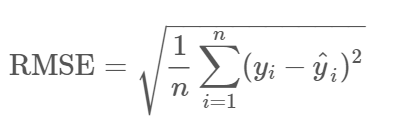

yi = valor real

yi(sombrero) = valor pronosticado

n = número de observaciones

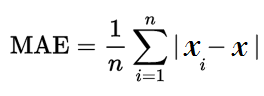

xi = valor real

x = valor pronosticado

n = número de observaciones

Para el apartado de la métrica a emplear para ver la eficacia de nuestro modelo, estábamos entre dos opciones, el MAE (Mean absolute error) y el RMSE (Root mean absolute error). Sabemos que ambas métricas dan resultados en las mismas unidades de la variable de interés y que van de 0 al infinito. Pero en el caso de nuestro proyecto, nos interesa más utilizar el RMSE ya que este penaliza más a los errores grandes (en nuestro caso, la diferencia de ventas reales y predichas) y como estamos hablando de número de ventas en Wallmart, los números con los que trabajaremos serán de gran magnitud, por lo que esto nos dará una mejor idea de qué tan bueno es nuestro modelo, además, trabajar con MAE nos podría traer complicaciones matemáticas debido al uso del valor absoluto. En el caso de la interpretación del valor de RMSE, mientras más cercano a 0 sea el valor, mas preciso será nuestro modelo. 
De la misma manera, hemos considerado los feriados al momento de predecir, ya que estos pueden aumentar o disminuir ventas, como el caso de navidad, 25 de Diciembre, la tienda se encuentra cerrada y por ende no se generan ventas. Asimimso, el subsidio snap también puede ayudar a predecir las ventas, ya que en estos días las ventas incrementan. 
Otro punto a tener en cuenta es la venta de productos similares, es decir, si las ventas de pollo aumentan, esto puede 

---

# Sales Forecasting
Debemos predecir las ventas de cada uno de los días dentro del Forecast horizon de 28 días (desde el día `d_1913` hasta el día `d_1941`) por cada uno de los 3049 productos que se venden en las 10 tiendas a lo largo de los 3 estados California (CA), Texas (TX) y Wisconsin (WI), en total 30 490 productos.

In [ ]:
stv_days_cols = [d for d in stv.columns if 'd_' in d] 
print(stv_days_cols)

['d_1', 'd_2', 'd_3', 'd_4', 'd_5', 'd_6', 'd_7', 'd_8', 'd_9', 'd_10', 'd_11', 'd_12', 'd_13', 'd_14', 'd_15', 'd_16', 'd_17', 'd_18', 'd_19', 'd_20', 'd_21', 'd_22', 'd_23', 'd_24', 'd_25', 'd_26', 'd_27', 'd_28', 'd_29', 'd_30', 'd_31', 'd_32', 'd_33', 'd_34', 'd_35', 'd_36', 'd_37', 'd_38', 'd_39', 'd_40', 'd_41', 'd_42', 'd_43', 'd_44', 'd_45', 'd_46', 'd_47', 'd_48', 'd_49', 'd_50', 'd_51', 'd_52', 'd_53', 'd_54', 'd_55', 'd_56', 'd_57', 'd_58', 'd_59', 'd_60', 'd_61', 'd_62', 'd_63', 'd_64', 'd_65', 'd_66', 'd_67', 'd_68', 'd_69', 'd_70', 'd_71', 'd_72', 'd_73', 'd_74', 'd_75', 'd_76', 'd_77', 'd_78', 'd_79', 'd_80', 'd_81', 'd_82', 'd_83', 'd_84', 'd_85', 'd_86', 'd_87', 'd_88', 'd_89', 'd_90', 'd_91', 'd_92', 'd_93', 'd_94', 'd_95', 'd_96', 'd_97', 'd_98', 'd_99', 'd_100', 'd_101', 'd_102', 'd_103', 'd_104', 'd_105', 'd_106', 'd_107', 'd_108', 'd_109', 'd_110', 'd_111', 'd_112', 'd_113', 'd_114', 'd_115', 'd_116', 'd_117', 'd_118', 'd_119', 'd_120', 'd_121', 'd_122', 'd_123', 

In [ ]:
past_sales = stv.set_index('id')[stv_days_cols].T.merge(cal.set_index('d')['date'], left_index=True, right_index=True, validate='1:1').set_index('date')
past_sales

HOBBIES_1_001_CA_1_validation  HOBBIES_1_002_CA_1_validation  \
date                                                                       
2011-01-29                              0                              0   
2011-01-30                              0                              0   
2011-01-31                              0                              0   
2011-02-01                              0                              0   
2011-02-02                              0                              0   
...                                   ...                            ...   
2016-04-20                              1                              1   
2016-04-21                              3                              0   
2016-04-22                              0                              0   
2016-04-23                              1                              0   
2016-04-24                              1                              0   

            HOBBIES_1_003_CA_1_validation  HOBBIES_1_004_CA_1_validation  \
date                                                                       
2011-01-29                              0                              0   
2011-01-30                              0                              0   
2011-01-31                              0                              0   
2011-02-01                              0                              0   
2011-02-02                              0                              0   
...                                   ...                            ...   
2016-04-20                              1                              0   
2016-04-21                              0                              1   
2016-04-22                              1                              3   
2016-04-23                              1                              7   
2016-04-24                              1                              2   

            HOBBIES_1_005_CA_1_validation  HOBBIES_1_006_CA_1_validation  \
date                                                                       
2011-01-29                              0                              0   
2011-01-30                              0                              0   
2011-01-31                              0                              0   
2011-02-01                              0                              0   
2011-02-02                              0                              0   
...                                   ...                            ...   
2016-04-20                              1                              0   
2016-04-21                              2                              0   
2016-04-22                              2                              2   
2016-04-23                              2                              0   
2016-04-24                              4                              0   

            HOBBIES_1_007_CA_1_validation  HOBBIES_1_008_CA_1_validation  \
date                                                                       
2011-01-29                              0                             12   
2011-01-30                              0                             15   
2011-01-31                              0                              0   
2011-02-01                              0                              0   
2011-02-02                              0                              0   
...                                   ...                            ...   
2016-04-20                              1                              4   
2016-04-21                              0                              6   
2016-04-22                              0                              3   
2016-04-23                              1                              2   
2016-04-24                              1                              1   

            HOBBIES_1_009_CA_1_validation  HOBBIES_1_010

In [ ]:
stev_days_cols = [d for d in stev.columns if 'd_' in d] 
print(stev_days_cols)

['d_1', 'd_2', 'd_3', 'd_4', 'd_5', 'd_6', 'd_7', 'd_8', 'd_9', 'd_10', 'd_11', 'd_12', 'd_13', 'd_14', 'd_15', 'd_16', 'd_17', 'd_18', 'd_19', 'd_20', 'd_21', 'd_22', 'd_23', 'd_24', 'd_25', 'd_26', 'd_27', 'd_28', 'd_29', 'd_30', 'd_31', 'd_32', 'd_33', 'd_34', 'd_35', 'd_36', 'd_37', 'd_38', 'd_39', 'd_40', 'd_41', 'd_42', 'd_43', 'd_44', 'd_45', 'd_46', 'd_47', 'd_48', 'd_49', 'd_50', 'd_51', 'd_52', 'd_53', 'd_54', 'd_55', 'd_56', 'd_57', 'd_58', 'd_59', 'd_60', 'd_61', 'd_62', 'd_63', 'd_64', 'd_65', 'd_66', 'd_67', 'd_68', 'd_69', 'd_70', 'd_71', 'd_72', 'd_73', 'd_74', 'd_75', 'd_76', 'd_77', 'd_78', 'd_79', 'd_80', 'd_81', 'd_82', 'd_83', 'd_84', 'd_85', 'd_86', 'd_87', 'd_88', 'd_89', 'd_90', 'd_91', 'd_92', 'd_93', 'd_94', 'd_95', 'd_96', 'd_97', 'd_98', 'd_99', 'd_100', 'd_101', 'd_102', 'd_103', 'd_104', 'd_105', 'd_106', 'd_107', 'd_108', 'd_109', 'd_110', 'd_111', 'd_112', 'd_113', 'd_114', 'd_115', 'd_116', 'd_117', 'd_118', 'd_119', 'd_120', 'd_121', 'd_122', 'd_123', 

In [ ]:
df = stev.set_index('id')[stev_days_cols].T.merge(cal.set_index('d')['date'], left_index=True, right_index=True, validate='1:1') # we need 'date' as col
df  # This is the dataframe we are going to use for the N-BEATS model, especifically when we use .historical_forecasts() and predict()

HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_002_CA_1_evaluation  \
d_1                                 0                              0   
d_2                                 0                              0   
d_3                                 0                              0   
d_4                                 0                              0   
d_5                                 0                              0   
...                               ...                            ...   
d_1937                              0                              0   
d_1938                              3                              0   
d_1939                              3                              0   
d_1940                              0                              0   
d_1941                              1                              0   

        HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_004_CA_1_evaluation  \
d_1                                 0                              0   
d_2                                 0                              0   
d_3                                 0                              0   
d_4                                 0                              0   
d_5                                 0                              0   
...                               ...                            ...   
d_1937                              0                              1   
d_1938                              2                              3   
d_1939                              3                              0   
d_1940                              0                              2   
d_1941                              1                              6   

        HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_006_CA_1_evaluation  \
d_1                                 0                              0   
d_2                                 0                              0   
d_3                                 0                              0   
d_4                                 0                              0   
d_5                                 0                              0   
...                               ...                            ...   
d_1937                              0                              0   
d_1938                              0                              0   
d_1939                              2                              5   
d_1940                              1                              2   
d_1941                              0                              0   

        HOBBIES_1_007_CA_1_evaluation  HOBBIES_1_008_CA_1_evaluation  \
d_1                                 0                             12   
d_2                                 0                             15   
d_3                                 0                              0   
d_4                                 0                              0   
d_5                                 0                              0   
...                               ...                            ...   
d_1937                              1                              5   
d_1938                              0                              4   
d_1939                              1                              1   
d_1940                              1                             40   
d_1941                              0                             32   

        HOBBIES_1_009_CA_1_evaluation  HOBBIES_1_010_CA_1_evaluation  ...  \
d_1                                 2                              0  ...   
d_2                                 0                              0  ...   
d_3                                 7                              1  ...   
d_4                                 3                              0  ...   
d_5                                 0                              0  ...   
...                               ...                            ...  ...   
d_1937   

In [ ]:
df.loc[df.index == 'd_1913'].iloc[0,-1]  # first day of forecast horizon

'2016-04-24'

In [ ]:
df.loc[df.index == 'd_1941'].iloc[0,-1]  # last day of forecast horizon

'2016-05-22'

In [ ]:
df["overall_sales"] = df.iloc[:, :-1].sum(axis=1)
df

HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_002_CA_1_evaluation  \
d_1                                 0                              0   
d_2                                 0                              0   
d_3                                 0                              0   
d_4                                 0                              0   
d_5                                 0                              0   
...                               ...                            ...   
d_1937                              0                              0   
d_1938                              3                              0   
d_1939                              3                              0   
d_1940                              0                              0   
d_1941                              1                              0   

        HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_004_CA_1_evaluation  \
d_1                                 0                              0   
d_2                                 0                              0   
d_3                                 0                              0   
d_4                                 0                              0   
d_5                                 0                              0   
...                               ...                            ...   
d_1937                              0                              1   
d_1938                              2                              3   
d_1939                              3                              0   
d_1940                              0                              2   
d_1941                              1                              6   

        HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_006_CA_1_evaluation  \
d_1                                 0                              0   
d_2                                 0                              0   
d_3                                 0                              0   
d_4                                 0                              0   
d_5                                 0                              0   
...                               ...                            ...   
d_1937                              0                              0   
d_1938                              0                              0   
d_1939                              2                              5   
d_1940                              1                              2   
d_1941                              0                              0   

        HOBBIES_1_007_CA_1_evaluation  HOBBIES_1_008_CA_1_evaluation  \
d_1                                 0                             12   
d_2                                 0                             15   
d_3                                 0                              0   
d_4                                 0                              0   
d_5                                 0                              0   
...                               ...                            ...   
d_1937                              1                              5   
d_1938                              0                              4   
d_1939                              1                              1   
d_1940                              1                             40   
d_1941                              0                             32   

        HOBBIES_1_009_CA_1_evaluation  HOBBIES_1_010_CA_1_evaluation  ...  \
d_1                                 2                              0  ...   
d_2                                 0                              0  ...   
d_3                                 7                              1  ...   
d_4                                 3                              0  ...   
d_5                                 0                              0  ...   
...                               ...                            ...  ...   
d_1937   

---

# Test de distribución Normal o Gaussiana de las ventas históricas de los ítems:

In [ ]:
data = stev.set_index('id')[stev_days_cols].T.merge(cal.set_index('d')['date'], left_index=True, right_index=True, validate='1:1').set_index('date')
cols = stev_days_cols.copy()
cols.append('id')
best_selling = stev[cols].copy()
best_selling['total_sales'] = stev[stev_days_cols].sum(axis=1)
best_selling = best_selling[['id', 'total_sales']].sort_values('total_sales', ascending=False)
bs_names = list(best_selling['id'][:5])  # Selecting the 5 best selling products

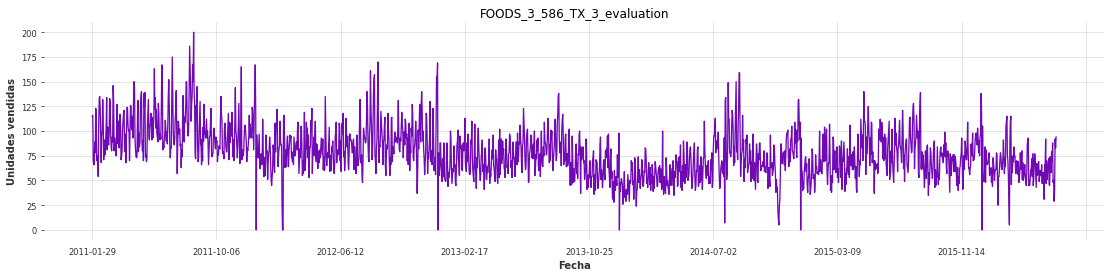

In [ ]:
item = np.random.choice(bs_names)
data[item].plot(title=item, figsize=(19,4), color='#7209b7')
plt.ylabel('Unidades vendidas')
plt.xlabel('Fecha')
plt.show()

In [ ]:
data[item]

date
2011-01-29    115
2011-01-30    116
2011-01-31     71
2011-02-01     66
2011-02-02     66
             ... 
2016-05-18     29
2016-05-19     39
2016-05-20     92
2016-05-21     83
2016-05-22     94
Name: FOODS_3_586_TX_3_evaluation, Length: 1941, dtype: int64

A continuación se realizará el test de normalidad de Anderson-Darling para evaluar la normalidad de las ventas de alguno de los 5 ítems más vendidos:

In [ ]:
data_sales = list(data[item])
result = anderson(data_sales)
print(f"stat= {(result.statistic):.3f}")
for i in range(len(result.critical_values)):
  sig_level, crit_val = result.significance_level[i], result.critical_values[i]
  if result.statistic < crit_val:
    print(f"Probably Gaussian: {crit_val} critical value at {sig_level} level of significance.")
  else:
    print(f"Probably not Gaussian: {crit_val} critical value at {sig_level} level of significance.")

stat= 10.621
Probably not Gaussian: 0.575 critical value at 15.0 level of significance.
Probably not Gaussian: 0.655 critical value at 10.0 level of significance.
Probably not Gaussian: 0.785 critical value at 5.0 level of significance.
Probably not Gaussian: 0.916 critical value at 2.5 level of significance.
Probably not Gaussian: 1.09 critical value at 1.0 level of significance.


Como se puede ver las ventas históricas no tienen una distribución normal en ningún nivel de significancia. Sin embargo, en la experimentación futura se trabajará con data estacionaria de la venta de cada uno de los 30,490 ítems y se volverá a evaluar la normalidad de la data, en caso de tener una distribución normal se procederá a utilizar la normalización de la data Standard.

Con base en lo mencionado, se optará por usar la Normalización MinMax de la data.

# NBEATS:
Nombre completo: Neural basis expansion analysis for interpretable time series forecasting (Boris N. Oreshkin, Dmitri Carpov, Nicolas Chapados, Yoshua Bengio)

Este modelo fue publicado en el año 2019 y alcanzó fama por ser utilizado, a través de un modelo híbrido de machine learning y estadística, por el 2do lugar de la competencia M5: accuracy.

Este modelo cuenta con dos variantes:
* **La variante genérica** que cuenta en la cual se puede modificar el número de stacks que cuenta el modelo.
* **La variante interpretable** que cuenta con dos stacks, uno para la tendencia y otra para la estacionalidad. Esta variante sacrifica un poco de precisión a cambio de ofrecer valores que ofrezcan una mayor interpretabilidad para la mejora de toma de decisiones de los stakeholders de la empresa.


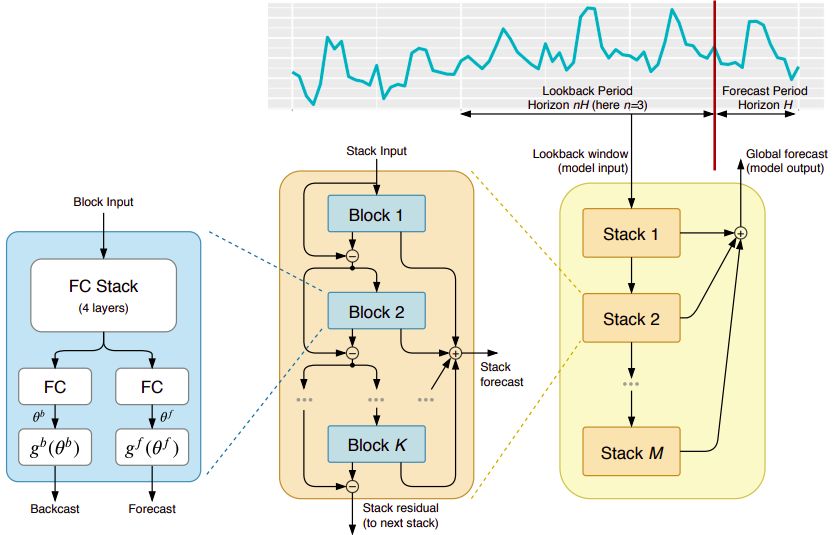

Para lograr implementar este modelo se optó por usar la librería High Level Darts, que se especializa por contar con herramientas específicas para resolver problemas relacionadas a series de tiempo.

## NBEATS: Genérica
**Hiperparámetros**
* `Input_chunk`(int): esta variable representa el tamaño del input con el cual se alimenta cada bloque. En este caso cuando se analizó la data gracias a la herramienta de [PyCaret](https://colab.research.google.com/drive/1G_igSdmsQ5OMFfKYPMrSXllE8uCtivOh?authuser=1#scrollTo=z05YdkEB3WZ8) en el Entregable 1, se halló que esta tiene principalmente una estacionalidad de 7 días o 1 semana, es decir, se cuenta con un patrón de ventas que se repite cada semana.
* `Output_chunk(int)`: será el output de cada stack y el input de la siguiente stack.
* `num_stacks`(int): será el número de stacks con el que cuente el modelo. Este valor se puede cambiar solo si usa la variante genérica.
* `num_blocks`(int): es el número de bloques que conforman un stack.
* `layer_widths`(int): Determina el número de neuronas que conforman cada capa completamente conectada.
* `optimizer_cls`: Es el optimizador del modelo. Se tiene como optimizador predeterminado a Adam de la libreria PyTorch.
* `optimizer_kwargs`: nos permite modificar los argumentos del optimizador elegido, como por ejemplo el valor del Learning Rate.
* `dropout`(float): Es la probabilidad de drop out que se tendrá en las capas completamente conectadas.
*`batch_size`(int): es el tamaño o número de instancias de cada batch de entrenamiento.
*`n_epochs`(int): es el número de épocas por las cuales se entrenará el modelo.
* `force_reset`(bool): inicializa el modelo eliminado la data almacenada de previos entrenamientos.
* `pl_trainer_kwargs`: en este parámetro podemos agregar métodos que modifiquen o que influyan en el entrenamiento o testing, como por ejemplo implementar Early Stopping en el entrenamiento.

A continuación se presentan los mejores resultados obtenidos de durante la experimentación.






### Importar las librerias necesarias

In [ ]:
!pip install darts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 451 kB 5.0 MB/s 
     |████████████████████████████████| 575 kB 15.9 MB/s 
     |████████████████████████████████| 76.6 MB 1.4 MB/s 
     |████████████████████████████████| 9.9 MB 50.3 MB/s 
     |████████████████████████████████| 1.9 MB 45.9 MB/s 
     |████████████████████████████████| 800 kB 45.8 MB/s 
     |████████████████████████████████| 9.4 MB 50.6 MB/s 
     |████████████████████████████████| 43 kB 1.6 MB/s 
     |████████████████████████████████| 91 kB 8.0 MB/s 
     |████████████████████████████████| 1.6 MB 39.2 MB/s 
     |████████████████████████████████| 295 kB 65.2 MB/s 
     |████████████████████████████████| 965 kB 62.5 MB/s 
     |████████████████████████████████| 512 kB 72.1 MB/s 
     |████████████████████████████████| 125 kB 74.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Un

In [ ]:
from darts import TimeSeries
from darts.models import NBEATSModel, TFTModel
from darts.dataprocessing.transformers import Scaler, MissingValuesFiller
from darts.metrics import mape, r2_score, rmse
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.utils.likelihood_models import QuantileRegression # This is for the TFT

In [ ]:
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

In [ ]:
import torch.nn
import torchmetrics

## NBEATS: Genérica - Predección de ventas generales

### Preprocesamiento de la data para el modelo

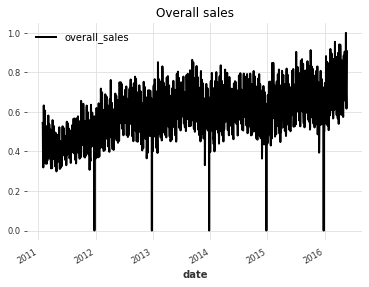

In [ ]:
filler = MissingValuesFiller()
scaler = Scaler()      # This is a normalization to scale all the values from 0 to 1
series = scaler.fit_transform( filler.transform(TimeSeries.from_dataframe(df, "date", ["overall_sales"]))).astype(np.float32)
series.plot()
plt.title("Overall sales")
plt.show()

In [ ]:
series

<TimeSeries (DataArray) (date: 1941, component: 1, sample: 1)>
array([[[0.54448336]],

       [[0.5297613 ]],

       [[0.39679518]],

       ...,

       [[0.7100818 ]],

       [[0.8597396 ]],

       [[0.9068102 ]]], dtype=float32)
Coordinates:
  * date       (date) datetime64[ns] 2011-01-29 2011-01-30 ... 2016-05-22
  * component  (component) object 'overall_sales'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
series.columns

Index(['overall_sales'], dtype='object', name='component')

In [ ]:
series.time_index

DatetimeIndex(['2011-01-29', '2011-01-30', '2011-01-31', '2011-02-01',
               '2011-02-02', '2011-02-03', '2011-02-04', '2011-02-05',
               '2011-02-06', '2011-02-07',
               ...
               '2016-05-13', '2016-05-14', '2016-05-15', '2016-05-16',
               '2016-05-17', '2016-05-18', '2016-05-19', '2016-05-20',
               '2016-05-21', '2016-05-22'],
              dtype='datetime64[ns]', name='date', length=1941, freq='D')

In [ ]:
series.univariate_values()

array([0.54448336, 0.5297613 , 0.39679518, ..., 0.7100818 , 0.8597396 ,
       0.9068102 ], dtype=float32)

### Split del dataset

In [ ]:
rest, test = series.split_after(pd.Timestamp('2016-04-24'))  # This is the 1st day of forecast horizon day 1913. We want to predict until 1941.

In [ ]:
len(rest)

1913

In [ ]:
def display_forecast(pred_series, ts_transformed, forecast_type, start_date=None):
    plt.figure(figsize=(15, 8))
    if start_date:
        ts_transformed = ts_transformed.drop_before(start_date)
    ts_transformed.univariate_component(0).plot(label="actual")
    pred_series.plot(label=("historic " + forecast_type + " forecasts"))
    plt.title( f"R2: {r2_score(ts_transformed.univariate_component(0), pred_series)}" )
    plt.legend()

### Intento A: Modelo entrenado usando covariables 


Este modelo tiene las principales características:
* Se empleó un input chunk de 7 días pues era la principal estacionariedad de la data. A través de la experimentación se comprobó que el modelo tenía un mejor rendimiento al usar este número.

* Se emplearon covariables de día de la semana, mes, año y una variable binaria de feriados génericos para USA (no la del dataset pues era la primera vez que se intentaba usar covariables para mejorar la predicción).

In [ ]:
model_nbeats2 = NBEATSModel(
    input_chunk_length=7,   # Say we have a pattern repeated week after week, so we set this parameter to the model look back an entire week into the past
    output_chunk_length=7,  
    generic_architecture=True,
    num_stacks=10,
    num_blocks=1,
    num_layers=4,  # SAME AS THE NUMBER OF COVARIATES USED
    layer_widths=512,
    n_epochs=100,
    nr_epochs_val_period=1,
    batch_size=32,  # Using the default value of 32
    save_checkpoints=True,
    model_name="nbeats_run2",
)

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


'2015-04-07' is the last day of the training set.

'2016-04-24' is the 1st day of forecast horizon day 1913. We want to predict until 1941.

'2016-05-22' is the last day of the forecast horizon, day 1941.

In [ ]:
covT = datetime_attribute_timeseries(series.time_index, attribute="day_of_week")
covT = covT.stack(  datetime_attribute_timeseries(covT.time_index, attribute="month")  )
covT = covT.stack(  datetime_attribute_timeseries(covT.time_index, attribute="year") )
covT = covT.add_holidays(country_code="US")   # Keep in mind that this only add one binary variable.
covT = covT.astype(np.float32)
covT

<TimeSeries (DataArray) (date: 1941, component: 4, sample: 1)>
array([[[5.000e+00],
        [1.000e+00],
        [2.011e+03],
        [0.000e+00]],

       [[6.000e+00],
        [1.000e+00],
        [2.011e+03],
        [0.000e+00]],

       [[0.000e+00],
        [1.000e+00],
        [2.011e+03],
        [0.000e+00]],

       ...,

       [[4.000e+00],
        [5.000e+00],
        [2.016e+03],
        [0.000e+00]],

       [[5.000e+00],
        [5.000e+00],
        [2.016e+03],
        [0.000e+00]],

       [[6.000e+00],
        [5.000e+00],
        [2.016e+03],
        [0.000e+00]]], dtype=float32)
Coordinates:
  * date       (date) datetime64[ns] 2011-01-29 2011-01-30 ... 2016-05-22
  * component  (component) object 'day_of_week' 'month' 'year' 'holidays'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
# train/test split
covT_train, covT_test = covT.split_after(pd.Timestamp('2016-04-24'))  # This is the 1st day of forecast horizon day 1913. We want to predict until 1941.

scalerT = Scaler()
scalerT.fit(covT_train)
covT_ttrain = scalerT.transform(covT_train)  # we scale train set
covT_ttest = scalerT.transform(covT_test)    # we scale test set
covT_t = scalerT.transform(covT)             # we scale the whole set

covT_t = covT_t.astype(np.float32)

pd.options.display.float_format = '{:.0f}'.format
print("first and last row of unscaled time covariates:")
covT.pd_dataframe().iloc[[0,-1]]

first and last row of unscaled time covariates:


component   day_of_week  month  year  holidays
date                                          
2011-01-29            5      1  2011         0
2016-05-22            6      5  2016         0

Cabe recalcar que para este modelo no se usaron las covariables `snap_CA`, `snap_TX`, `snap_WI`, pues el problema principal es predecir las ventas de cada uno de 30 490 ítems, para ese modelo sí se implementan.

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
print("first and last row of scaled covariates, training + test set:")   # Note that we have also scaled the date time variables (day, week, year, etc.)
covT_t.pd_dataframe().iloc[[0,-1]]

first and last row of scaled covariates, training + test set:


component   day_of_week  month  year  holidays
date                                          
2011-01-29         0.83   0.00  0.00      0.00
2016-05-22         1.00   0.36  1.00      0.00

In [ ]:
model_nbeats2.fit(series=rest, past_covariates=covT_t, val_series=test, val_past_covariates=covT_t, verbose=True)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 8.1 M 
---------------------------------------------------
8.1 M     Trainable params
2.8 K     Non-trainable params
8.1 M     Total params
32.478    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


In [ ]:
nbeats_forecast = model_nbeats2.predict(n=28, past_covariates=covT_t)

Predicting: 60it [00:00, ?it/s]

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=series.time_index, y=series.univariate_values(), mode="lines", name="full"))
fig.add_trace(go.Scatter(x=nbeats_forecast.time_index, y=nbeats_forecast.univariate_values(), mode="lines", name="forecast"))
fig.update_layout(title='Normalized overall sales', xaxis_title="Date", yaxis_title="relative sales")
fig.show()

In [ ]:
series_n = scaler.inverse_transform(series)
nbeats_forecast_n = scaler.inverse_transform(nbeats_forecast)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=series_n.time_index, y=series_n.univariate_values(), mode="lines", name="full"))
fig.add_trace(go.Scatter(x=nbeats_forecast_n.time_index, y=nbeats_forecast_n.univariate_values(), mode="lines", name="forecast"))
fig.update_layout(title='Overall sales', xaxis_title="Date", yaxis_title="Number of sales")
fig.show()

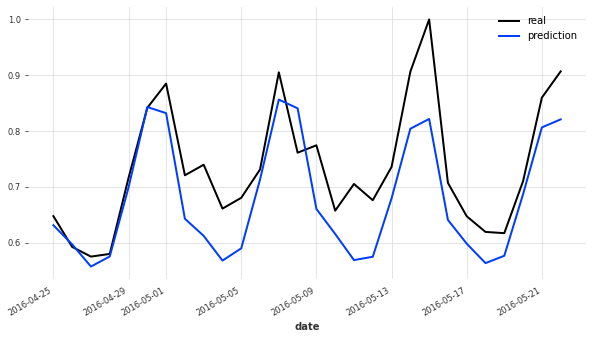

In [ ]:
series_fh = series.drop_before(pd.Timestamp("2016-04-24"))
plt.figure(figsize=(10,5))
series_fh.plot(label="real")
nbeats_forecast.univariate_component(0).plot(label="prediction")

In [ ]:
print( f"RMSE: {rmse(nbeats_forecast.univariate_component(0), series_fh)}" )

RMSE: 0.07642190158367157


In [ ]:
print( f"R^2: {r2_score(nbeats_forecast.univariate_component(0), series_fh)}" )

R^2: 0.4589199423789978


In [ ]:
SAVE = "/NBEATS_model_covariates.pth.tar"
mpath = "/content/drive/MyDrive/IRN Project G1 2022" + SAVE
model_nbeats2.save(mpath)

### Intento B: Modelo con mejor rendimiento

Los cambios para este modelo, después de 16 intentos previos para hallar los mejores hiperparámetros, son los siguientes:

* Se implementa Early Stopping con un `min_delta` de 0.003 y un Patience de 8 épocas.

* Se usan las covariables proporcionadas por el dataset de la competencia de día de la semana, mes, año, feriado 1 y feriado 2; por lo tanto se cambia el `num_layers` a 5.

* Se cambia la función de pérdida de MSE (Mean Squared Error) a L1Loss que según documentación de PyTorch es igual a MAE (Mean Absolute Error).

* Se agrega la métrica de evaluación de MAE (Mean Absolute Error).



In [ ]:
# stop training when validation loss does not decrease more than 0.01 (`min_delta`) over
# a period of 5 epochs (`patience`)       I CHANGED THE PATIENCE TO 10 AND MIN DELTA TO 0.008
my_stopper = EarlyStopping(
    monitor="val_loss",
    patience=8,
    min_delta=0.003,
    mode='min',
)

In [ ]:
model_nbeats14 = NBEATSModel(
    input_chunk_length=7,   # Say we have a pattern repeated week after week, so we set this parameter to the model look back an entire week into the past
    output_chunk_length=7,  
    generic_architecture=True,
    num_stacks=10,
    num_blocks=1,
    num_layers=5,
    layer_widths=512,
    n_epochs=100,
    nr_epochs_val_period=1,  # This is the default value
    batch_size=32,  # Using the default value of 32
    save_checkpoints=True,
    loss_fn=torch.nn.L1Loss(), 
    torch_metrics=torchmetrics.MeanAbsoluteError(),    
    pl_trainer_kwargs={"callbacks": [my_stopper]},
    force_reset=True,  # This allows the model to initialize from 0 and delete all the data it has accumulated during training
    model_name="nbeats_run14",
)

In [ ]:
model_nbeats14.fit(series=rest, past_covariates=covT_t, val_series=test, val_past_covariates=covT_t, verbose=True)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | L1Loss           | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 10.8 M
---------------------------------------------------
10.8 M    Trainable params
2.8 K     Non-trainable params
10.8 M    Total params
43.131    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [ ]:
nbeats_forecast = model_nbeats14.predict(n=28, past_covariates=covT_t)

Predicting: 60it [00:00, ?it/s]

'2015-04-07' is the last day of the training set.

'2016-04-24' is the 1st day of forecast horizon day 1913. We want to predict until 1941.

'2016-05-22' is the last day of the forecast horizon, day 1941.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=series.time_index, y=series.univariate_values(), mode="lines", name="full"))
fig.add_trace(go.Scatter(x=nbeats_forecast.time_index, y=nbeats_forecast.univariate_values(), mode="lines", name="forecast"))
fig.update_layout(title='Normalized overall sales', xaxis_title="Date", yaxis_title="relative sales")
fig.show()

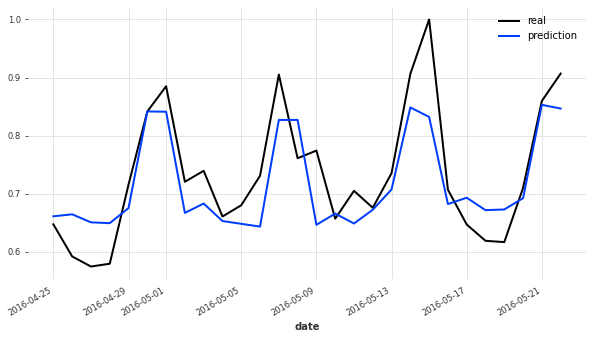

In [ ]:
series_fh = series.drop_before(pd.Timestamp("2016-04-24"))
plt.figure(figsize=(10,5))
series_fh.plot(label="real")
nbeats_forecast.univariate_component(0).plot(label="prediction")

In [ ]:
print( f"RMSE: {rmse(nbeats_forecast.univariate_component(0), series_fh)}" )

RMSE: 0.06250274181365967


In [ ]:
print( f"R^2: {r2_score(nbeats_forecast.univariate_component(0), series_fh)}" )

R^2: 0.37904471158981323


In [ ]:
SAVE = "/NBEATS_intento_17.pth.tar"
mpath = "/content/drive/MyDrive/IRN Project G1 2022" + SAVE
model_nbeats12 .save(mpath)

In [ ]:
series_n = scaler.inverse_transform(series)
nbeats_forecast_n = scaler.inverse_transform(nbeats_forecast)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=series_n.time_index, y=series_n.univariate_values(), mode="lines", name="full"))
fig.add_trace(go.Scatter(x=nbeats_forecast_n.time_index, y=nbeats_forecast_n.univariate_values(), mode="lines", name="forecast"))
fig.update_layout(title='Overall sales', xaxis_title="Date", yaxis_title="Number of sales")
fig.show()

#### Ejemplos correctamente predichos
Si se hace zoom en las demostraciones visuales cerca del forecast horizon 25 Abril 2016 a 22 de Mayo de 2016, se puede ver los siguiente:
* **Ejemplos correctamente predichos:** Por ejemplo, en la fecha 30 de Abril se tiene un forecast de 50 430 ventas, cuando las ventas reales fueron de 50 429, valor practicamente igual. 
* **Ejemplos incorrectamente predichos:** Son los demás valores de venta predichos que son un poco más lejanos a los reales.

In [ ]:
series_fh_n = scaler.inverse_transform(series_fh)

In [ ]:
print( f"RMSE: {rmse(nbeats_forecast_n.univariate_component(0), series_fh_n)}" )

RMSE: 3744.53955078125


</br>

---

## NBEATS: Genérica - Predección de ventas individuales

### Preprocesamiento de la data para el modelo

#### Covariables
Preprocesamiento de las covariables del modelo que ayudarán a predecir las ventas:

In [ ]:
holidays_names = cal[["date","event_name_1", "event_name_2"]]
holidays_names

date  event_name_1  event_name_2
0     2011-01-29           NaN           NaN
1     2011-01-30           NaN           NaN
2     2011-01-31           NaN           NaN
3     2011-02-01           NaN           NaN
4     2011-02-02           NaN           NaN
...          ...           ...           ...
1964  2016-06-15           NaN           NaN
1965  2016-06-16           NaN           NaN
1966  2016-06-17           NaN           NaN
1967  2016-06-18           NaN           NaN
1968  2016-06-19  NBAFinalsEnd  Father's day

[1969 rows x 3 columns]

In [ ]:
holidays_bi = holidays_names.fillna(0)
holidays_bi

date  event_name_1  event_name_2
0     2011-01-29             0             0
1     2011-01-30             0             0
2     2011-01-31             0             0
3     2011-02-01             0             0
4     2011-02-02             0             0
...          ...           ...           ...
1964  2016-06-15             0             0
1965  2016-06-16             0             0
1966  2016-06-17             0             0
1967  2016-06-18             0             0
1968  2016-06-19  NBAFinalsEnd  Father's day

[1969 rows x 3 columns]

In [ ]:
holidays_bi.loc[holidays_bi["event_name_1"] == 0].count()

date            1807
event_name_1    1807
event_name_2    1807
dtype: int64

In [ ]:
holidays_bi["event_name_1"].value_counts(dropna=False)

0                      1807
Pesach End                6
Ramadan starts            6
SuperBowl                 6
NBAFinalsEnd              6
NBAFinalsStart            6
MemorialDay               6
Mother's day              6
Purim End                 6
StPatricksDay             6
LentWeek2                 6
LentStart                 6
PresidentsDay             6
ValentinesDay             6
MartinLutherKingDay       5
OrthodoxChristmas         5
EidAlAdha                 5
NewYear                   5
Chanukah End              5
Christmas                 5
Thanksgiving              5
VeteransDay               5
Easter                    5
Halloween                 5
ColumbusDay               5
LaborDay                  5
Eid al-Fitr               5
IndependenceDay           5
Cinco De Mayo             5
OrthodoxEaster            5
Father's day              4
Name: event_name_1, dtype: int64

In [ ]:
holidays_bi1 = holidays_bi.replace(to_replace="[a-z]", value=1, regex=True)
holidays_bi1

date event_name_1 event_name_2
0     2011-01-29            0            0
1     2011-01-30            0            0
2     2011-01-31            0            0
3     2011-02-01            0            0
4     2011-02-02            0            0
...          ...          ...          ...
1964  2016-06-15            0            0
1965  2016-06-16            0            0
1966  2016-06-17            0            0
1967  2016-06-18            0            0
1968  2016-06-19            1            1

[1969 rows x 3 columns]

In [ ]:
hol_series = TimeSeries.from_dataframe(holidays_bi1, "date", ["event_name_1", "event_name_2"])
hol_series

<TimeSeries (DataArray) (date: 1969, component: 2, sample: 1)>
array([[[0.],
        [0.]],

       [[0.],
        [0.]],

       [[0.],
        [0.]],

       ...,

       [[0.],
        [0.]],

       [[0.],
        [0.]],

       [[1.],
        [1.]]])
Coordinates:
  * date       (date) datetime64[ns] 2011-01-29 2011-01-30 ... 2016-06-19
  * component  (component) object 'event_name_1' 'event_name_2'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
hol_series = hol_series.drop_after(pd.Timestamp("2016-05-23"))
hol_series

<TimeSeries (DataArray) (date: 1941, component: 2, sample: 1)>
array([[[0.],
        [0.]],

       [[0.],
        [0.]],

       [[0.],
        [0.]],

       ...,

       [[0.],
        [0.]],

       [[0.],
        [0.]],

       [[0.],
        [0.]]])
Coordinates:
  * date       (date) datetime64[ns] 2011-01-29 2011-01-30 ... 2016-05-22
  * component  (component) object 'event_name_1' 'event_name_2'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
covT = datetime_attribute_timeseries(past_sales_series.time_index, attribute="day_of_week")
covT = covT.stack(  datetime_attribute_timeseries(covT.time_index, attribute="month")  )
covT = covT.stack(  datetime_attribute_timeseries(covT.time_index, attribute="year") )
covT = covT.stack(hol_series)
covT = covT.astype(np.float32)
covT

<TimeSeries (DataArray) (date: 1941, component: 5, sample: 1)>
array([[[5.000e+00],
        [1.000e+00],
        [2.011e+03],
        [0.000e+00],
        [0.000e+00]],

       [[6.000e+00],
        [1.000e+00],
        [2.011e+03],
        [0.000e+00],
        [0.000e+00]],

       [[0.000e+00],
        [1.000e+00],
        [2.011e+03],
        [0.000e+00],
        [0.000e+00]],

       ...,

       [[4.000e+00],
        [5.000e+00],
        [2.016e+03],
        [0.000e+00],
        [0.000e+00]],

       [[5.000e+00],
        [5.000e+00],
        [2.016e+03],
        [0.000e+00],
        [0.000e+00]],

       [[6.000e+00],
        [5.000e+00],
        [2.016e+03],
        [0.000e+00],
        [0.000e+00]]], dtype=float32)
Coordinates:
  * date       (date) datetime64[ns] 2011-01-29 2011-01-30 ... 2016-05-22
  * component  (component) object 'day_of_week' 'month' ... 'event_name_2'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
pd.options.display.float_format = '{:.0f}'.format
print("first and last row of unscaled time covariates:")
covT.pd_dataframe().iloc[[0,-1]]

first and last row of unscaled time covariates:


component   day_of_week  month  year  event_name_1  event_name_2
date                                                            
2011-01-29            5      1  2011             0             0
2016-05-22            6      5  2016             0             0

Se procederá a usa MinxMax normalization para la data, es el tipo de normalización predeterminado de la clase Scaler() empleada a continuación:

In [ ]:
# train/test split
covT_train, covT_test = covT.split_after(pd.Timestamp('2016-04-24'))  # This is the 1st day of forecast horizon day 1913. We want to predict until 1941.

# rescale the covariates: fitting on the training set, values range from 0 to 1
scalerT = Scaler()
scalerT.fit(covT_train)
covT_ttrain = scalerT.transform(covT_train)  # we scale train set
covT_ttest = scalerT.transform(covT_test)    # we scale test set
covT_t = scalerT.transform(covT)             # we scale the whole set

covT_t = covT_t.astype(np.float32)
pd.options.display.float_format = '{:.2f}'.format
print("first and last row of scaled covariates, training + test set:")   # Note that he has also scaled the date time variables (day, week, year, etc.)
covT_t.pd_dataframe().iloc[[0,-1]]

first and last row of scaled covariates, training + test set:


component   day_of_week  month  year  event_name_1  event_name_2
date                                                            
2011-01-29         0.83   0.00  0.00          0.00          0.00
2016-05-22         1.00   0.36  1.00          0.00          0.00

#### Ventas históricas
Preprocesamiento de los históricos de ventas de los 30,490 productos o ítems:

In [ ]:
stev

id        item_id    dept_id   cat_id  \
0      HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1      HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2      HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3      HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
4      HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                              ...            ...        ...      ...   
30485    FOODS_3_823_WI_3_evaluation    FOODS_3_823    FOODS_3    FOODS   
30486    FOODS_3_824_WI_3_evaluation    FOODS_3_824    FOODS_3    FOODS   
30487    FOODS_3_825_WI_3_evaluation    FOODS_3_825    FOODS_3    FOODS   
30488    FOODS_3_826_WI_3_evaluation    FOODS_3_826    FOODS_3    FOODS   
30489    FOODS_3_827_WI_3_evaluation    FOODS_3_827    FOODS_3    FOODS   

      store_id state_id  d_1  d_2  d_3  d_4  ...  d_1932  d_1933  d_1934  \
0         CA_1       CA    0    0    0    0  ...       2       4       0   
1         CA_1       CA    0    0    0    0  ...       0       1       2   
2         CA_1       CA    0    0    0    0  ...       1       0       2   
3         CA_1       CA    0    0    0    0  ...       1       1       0   
4         CA_1       CA    0    0    0    0  ...       0       0       0   
...        ...      ...  ...  ...  ...  ...  ...     ...     ...     ...   
30485     WI_3       WI    0    0    2    2  ...       1       0       3   
30486     WI_3       WI    0    0    0    0  ...       0       0       0   
30487     WI_3       WI    0    6    0    2  ...       0       0       1   
30488     WI_3       WI    0    0    0    0  ...       1       1       1   
30489     WI_3       WI    0    0    0    0  ...       1       2       0   

       d_1935  d_1936  d_1937  d_1938  d_1939  d_1940  d_1941  
0           0       0       0       3       3       0       1  
1           1       1       0       0       0       0       0  
2           0       0       0       2       3       0       1  
3           4       0       1       3       0       2       6  
4           2       1       0       0       2       1       0  
...       ...     ...     ...     ...     ...     ...     ...  
30485       0       1       1       0       0       1       1  
30486       0       0       0       1       0       1       0  
30487       2       0       1       0       1       0       2  
30488       4       6       0       1       1       1       0  
30489       5       4       0       2       2       5       1  

[30490 rows x 1947 columns]

In [ ]:
stev_days_cols = [d for d in stev.columns if 'd_' in d] 
print(stev_days_cols)

['d_1', 'd_2', 'd_3', 'd_4', 'd_5', 'd_6', 'd_7', 'd_8', 'd_9', 'd_10', 'd_11', 'd_12', 'd_13', 'd_14', 'd_15', 'd_16', 'd_17', 'd_18', 'd_19', 'd_20', 'd_21', 'd_22', 'd_23', 'd_24', 'd_25', 'd_26', 'd_27', 'd_28', 'd_29', 'd_30', 'd_31', 'd_32', 'd_33', 'd_34', 'd_35', 'd_36', 'd_37', 'd_38', 'd_39', 'd_40', 'd_41', 'd_42', 'd_43', 'd_44', 'd_45', 'd_46', 'd_47', 'd_48', 'd_49', 'd_50', 'd_51', 'd_52', 'd_53', 'd_54', 'd_55', 'd_56', 'd_57', 'd_58', 'd_59', 'd_60', 'd_61', 'd_62', 'd_63', 'd_64', 'd_65', 'd_66', 'd_67', 'd_68', 'd_69', 'd_70', 'd_71', 'd_72', 'd_73', 'd_74', 'd_75', 'd_76', 'd_77', 'd_78', 'd_79', 'd_80', 'd_81', 'd_82', 'd_83', 'd_84', 'd_85', 'd_86', 'd_87', 'd_88', 'd_89', 'd_90', 'd_91', 'd_92', 'd_93', 'd_94', 'd_95', 'd_96', 'd_97', 'd_98', 'd_99', 'd_100', 'd_101', 'd_102', 'd_103', 'd_104', 'd_105', 'd_106', 'd_107', 'd_108', 'd_109', 'd_110', 'd_111', 'd_112', 'd_113', 'd_114', 'd_115', 'd_116', 'd_117', 'd_118', 'd_119', 'd_120', 'd_121', 'd_122', 'd_123', 

In [ ]:
len(stev_days_cols)

1941

In [ ]:
past_sales = stev.set_index('id')[stev_days_cols].T.merge(cal.set_index('d')['date'], left_index=True, right_index=True, validate='1:1').set_index('date')
past_sales

HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_002_CA_1_evaluation  \
date                                                                       
2011-01-29                              0                              0   
2011-01-30                              0                              0   
2011-01-31                              0                              0   
2011-02-01                              0                              0   
2011-02-02                              0                              0   
...                                   ...                            ...   
2016-05-18                              0                              0   
2016-05-19                              3                              0   
2016-05-20                              3                              0   
2016-05-21                              0                              0   
2016-05-22                              1                              0   

            HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_004_CA_1_evaluation  \
date                                                                       
2011-01-29                              0                              0   
2011-01-30                              0                              0   
2011-01-31                              0                              0   
2011-02-01                              0                              0   
2011-02-02                              0                              0   
...                                   ...                            ...   
2016-05-18                              0                              1   
2016-05-19                              2                              3   
2016-05-20                              3                              0   
2016-05-21                              0                              2   
2016-05-22                              1                              6   

            HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_006_CA_1_evaluation  \
date                                                                       
2011-01-29                              0                              0   
2011-01-30                              0                              0   
2011-01-31                              0                              0   
2011-02-01                              0                              0   
2011-02-02                              0                              0   
...                                   ...                            ...   
2016-05-18                              0                              0   
2016-05-19                              0                              0   
2016-05-20                              2                              5   
2016-05-21                              1                              2   
2016-05-22                              0                              0   

            HOBBIES_1_007_CA_1_evaluation  HOBBIES_1_008_CA_1_evaluation  \
date                                                                       
2011-01-29                              0                             12   
2011-01-30                              0                             15   
2011-01-31                              0                              0   
2011-02-01                              0                              0   
2011-02-02                              0                              0   
...                                   ...                            ...   
2016-05-18                              1                              5   
2016-05-19                              0                              4   
2016-05-20                              1                              1   
2016-05-21                              1                             40   
2016-05-22                              0                             32   

            HOBBIES_1_009_CA_1_evaluation  HOBBIES_1_010

In [ ]:
products_ids = past_sales.columns
products_ids 

Index(['HOBBIES_1_001_CA_1_evaluation', 'HOBBIES_1_002_CA_1_evaluation',
       'HOBBIES_1_003_CA_1_evaluation', 'HOBBIES_1_004_CA_1_evaluation',
       'HOBBIES_1_005_CA_1_evaluation', 'HOBBIES_1_006_CA_1_evaluation',
       'HOBBIES_1_007_CA_1_evaluation', 'HOBBIES_1_008_CA_1_evaluation',
       'HOBBIES_1_009_CA_1_evaluation', 'HOBBIES_1_010_CA_1_evaluation',
       ...
       'FOODS_3_818_WI_3_evaluation', 'FOODS_3_819_WI_3_evaluation',
       'FOODS_3_820_WI_3_evaluation', 'FOODS_3_821_WI_3_evaluation',
       'FOODS_3_822_WI_3_evaluation', 'FOODS_3_823_WI_3_evaluation',
       'FOODS_3_824_WI_3_evaluation', 'FOODS_3_825_WI_3_evaluation',
       'FOODS_3_826_WI_3_evaluation', 'FOODS_3_827_WI_3_evaluation'],
      dtype='object', length=30490)

In [ ]:
past_sales = past_sales.reset_index()
past_sales.head(1)

date  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_002_CA_1_evaluation  \
0  2011-01-29                              0                              0   

   HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_004_CA_1_evaluation  \
0                              0                              0   

   HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_006_CA_1_evaluation  \
0                              0                              0   

   HOBBIES_1_007_CA_1_evaluation  HOBBIES_1_008_CA_1_evaluation  \
0                              0                             12   

   HOBBIES_1_009_CA_1_evaluation  ...  FOODS_3_818_WI_3_evaluation  \
0                              2  ...                            0   

   FOODS_3_819_WI_3_evaluation  FOODS_3_820_WI_3_evaluation  \
0                           14                            1   

   FOODS_3_821_WI_3_evaluation  FOODS_3_822_WI_3_evaluation  \
0                            0                            4   

   FOODS_3_823_WI_3_evaluation  FOODS_3_824_WI_3_evaluation  \
0                            0                            0   

   FOODS_3_825_WI_3_evaluation  FOODS_3_826_WI_3_evaluation  \
0                            0                            0   

   FOODS_3_827_WI_3_evaluation  
0                            0  

[1 rows x 30491 columns]

This series contain all the normalized sales of the 30490 products, up until the last day of FH:

In [ ]:
scaler = Scaler()      # This is a normalization to scale all the values from 0 to 1
past_sales_series = scaler.fit_transform( TimeSeries.from_dataframe(past_sales, "date", products_ids )).astype(np.float32)
past_sales_series     # This series contain all the sales of the 30490 products, up until the last day of FH

<TimeSeries (DataArray) (date: 1941, component: 30490, sample: 1)>
array([[[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.3       ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
...
        ...,
        [0.05      ],
        [0.08333334],
        [0.16666667]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.08333334],
        [0.41666666]],

       [[0.2       ],
        [0.        ],
        [0.16666667],
        ...,
        [0.1       ],
        [0.        ],
        [0.08333334]]], dtype=float32)
Coordinates:
  * date       (date) datetime64[ns] 2011-01-29 2011-01-30 ... 2016-05-22
  * component  (component) object 'HOBBIES_1_001_CA_1_evaluation' ... 'FOODS_...
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

### Split del dataset

In [ ]:
rest, test = past_sales_series.split_after(pd.Timestamp('2016-04-24'))  # This is the 1st day of forecast horizon day 1913. We want to predict until 1941.

In [ ]:
rest

<TimeSeries (DataArray) (date: 1913, component: 30490, sample: 1)>
array([[[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.3       ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
...
        ...,
        [0.        ],
        [0.25      ],
        [0.        ]],

       [[0.2       ],
        [0.        ],
        [0.16666667],
        ...,
        [0.05      ],
        [0.08333334],
        [0.        ]],

       [[0.2       ],
        [0.        ],
        [0.16666667],
        ...,
        [0.        ],
        [0.25      ],
        [0.        ]]], dtype=float32)
Coordinates:
  * date       (date) datetime64[ns] 2011-01-29 2011-01-30 ... 2016-04-24
  * component  (component) object 'HOBBIES_1_001_CA_1_evaluation' ... 'FOODS_...
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

### Intento A: Uno de los primeros funcionales

Se tomaron en cuentas las siguientes características para el modelo:

* Se emplearon todas las covariables disponibles en el dataset de la competencia (8 en total): día de la semana, mes, año, feriado 1, feriado 2, snap_CA, snap_TX, snap_WI. Cabe recalcar que no se modificó el `num_layers = 5` que venía del modelo de predicción de ventas generales. 

* Se modificó el Early Stopping comparado con el modelo de predicción de ventas generales:
  * Se modificó el Patience de 8 a 20 épocas, esto porque, a parte que el entrenamiento de este modelo demoraba bastante, el resultado de la métrica de evaluación o `val_loss` disminuía de forma muy lenta, por ende era necesario aumentar la espera para interrumpir el entrenamiento.
  * Se redujo el `min_delta` de 0.003 a 0.002 para reducir el tiempo de entreamiento también. 

In [ ]:
my_stopper = EarlyStopping(
  monitor="val_loss",
  patience=20,  # I CHANGED THE PATIENCE TO 20 EPOCHS FOR THIS 4TH TRY 
  min_delta=0.002, # I CHANGED THE min delta FROM 0.003 TO 0.002
  mode='min',
)

In [ ]:
model_nbeats17 = NBEATSModel(
  input_chunk_length=7,   # Say we have a pattern repeated week after week, so we set this parameter to the model look back an entire week into the past
  output_chunk_length=7,  
  generic_architecture=True,
  num_stacks=10,
  num_blocks=1,
  num_layers=5,
  layer_widths=512,
  n_epochs=100,
  nr_epochs_val_period=1,  # This is the default value
  batch_size=32,  # Using the default value of 32
  save_checkpoints=True,
  loss_fn=torch.nn.L1Loss(), 
  torch_metrics=torchmetrics.MeanAbsoluteError(),    
  pl_trainer_kwargs={"callbacks": [my_stopper], "accelerator": "gpu", "devices": [0] },  # TO USE GPU'S
  force_reset=True,  # This allows the model to initialize from 0 and delete all the data it has accumulated during training
  model_name="nbeats_run17",
  )

I have to set the cuda GPU to use, because when I trained the model it said that is available but is not been used.

In [ ]:
model_nbeats17.fit(series=rest, past_covariates=covT_t, val_series=test, val_past_covariates=covT_t)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | L1Loss           | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 1.1 B 
---------------------------------------------------
1.1 B     Trainable params
1.3 M     Non-trainable params
1.1 B     Total params
4,516.477 Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [ ]:
nbeats_forecast = model_nbeats17.predict(n=28, past_covariates=covT_t)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 60it [00:00, ?it/s]

In [ ]:
nbeats_forecast

<TimeSeries (DataArray) (date: 28, component: 30490, sample: 1)>
array([[[-0.00425997],
        [-0.00070938],
        [-0.00288799],
        ...,
        [ 0.00871456],
        [ 0.00682524],
        [ 0.00418884]],

       [[ 0.00312209],
        [ 0.0009279 ],
        [-0.00459   ],
        ...,
        [ 0.00377701],
        [ 0.00817278],
        [ 0.00187021]],

       [[-0.0012776 ],
        [ 0.01187176],
        [ 0.00198197],
        ...,
...
        ...,
        [-0.00698119],
        [-0.0101288 ],
        [ 0.00620532]],

       [[ 0.02538408],
        [ 0.01923594],
        [-0.02558726],
        ...,
        [ 0.04112393],
        [ 0.01138802],
        [-0.00730696]],

       [[ 0.01022557],
        [-0.00505204],
        [ 0.01760723],
        ...,
        [ 0.02778577],
        [-0.01587275],
        [ 0.01102334]]], dtype=float32)
Coordinates:
  * date       (date) datetime64[ns] 2016-04-25 2016-04-26 ... 2016-05-22
  * component  (component) object 'HOBBIES_1_001_CA_1_evaluation' ... 'FOODS_...
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
test

<TimeSeries (DataArray) (date: 28, component: 30490, sample: 1)>
array([[[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.08333334],
        [0.        ]],

       [[0.        ],
        [0.2       ],
        [0.        ],
        ...,
        [0.        ],
        [0.25      ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.16666667],
        ...,
...
        ...,
        [0.05      ],
        [0.08333334],
        [0.16666667]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.08333334],
        [0.41666666]],

       [[0.2       ],
        [0.        ],
        [0.16666667],
        ...,
        [0.1       ],
        [0.        ],
        [0.08333334]]], dtype=float32)
Coordinates:
  * date       (date) datetime64[ns] 2016-04-25 2016-04-26 ... 2016-05-22
  * component  (component) object 'HOBBIES_1_001_CA_1_evaluation' ... 'FOODS_...
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
print( f"RMSE: {rmse(nbeats_forecast, test)}" )

RMSE: 0.14699895679950714


In [ ]:
print( f"R2_score: {r2_score(nbeats_forecast, test)}" )

R2_score: -1427.3345117354713


Inverso

In [ ]:
nbeats_forecast_n = scaler.inverse_transform(nbeats_forecast)

In [ ]:
forecast_n = nbeats_forecast_n.pd_dataframe()
forecast_n

component   HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_002_CA_1_evaluation  \
date                                                                       
2016-04-25                          -0.02                          -0.00   
2016-04-26                           0.02                           0.00   
2016-04-27                          -0.01                           0.06   
2016-04-28                           0.03                           0.01   
2016-04-29                          -0.00                          -0.03   
2016-04-30                           0.03                           0.01   
2016-05-01                           0.01                           0.04   
2016-05-02                          -0.09                           0.02   
2016-05-03                           0.11                          -0.14   
2016-05-04                           0.07                           0.03   
2016-05-05                           0.03                           0.15   
2016-05-06                          -0.02                           0.01   
2016-05-07                           0.13                           0.10   
2016-05-08                           0.05                          -0.03   
2016-05-09                          -0.09                           0.02   
2016-05-10                           0.11                          -0.14   
2016-05-11                           0.07                           0.03   
2016-05-12                           0.03                           0.15   
2016-05-13                          -0.02                           0.01   
2016-05-14                           0.13                           0.10   
2016-05-15                           0.05                          -0.03   
2016-05-16                          -0.09                           0.02   
2016-05-17                           0.11                          -0.14   
2016-05-18                           0.07                           0.03   
2016-05-19                           0.03                           0.15   
2016-05-20                          -0.02                           0.01   
2016-05-21                           0.13                           0.10   
2016-05-22                           0.05                          -0.03   

component   HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_004_CA_1_evaluation  \
date                                                                       
2016-04-25                          -0.02                           1.08   
2016-04-26                          -0.03                           0.99   
2016-04-27                           0.01                           1.07   
2016-04-28                           0.00                           1.10   
2016-04-29                          -0.00                           1.04   
2016-04-30                           0.00                           1.06   
2016-05-01                          -0.01                           0.96   
2016-05-02                          -0.07                           0.92   
2016-05-03                           0.03                           0.77   
2016-05-04                           0.25                           0.72   
2016-05-05                           0.05                           1.24   
2016-05-06                          -0.13                           0.60   
2016-05-07                          -0.15                           0.50   
2016-05-08                           0.11                           0.89   
2016-05-09                          -0.07                           0.92   
2016-05-10                           0.03                           0.77   
2016-05-11                           0.25                           0.72   
2016-05-12                           0.05                           1.24   
2016-05-13                          -0.13                           0.60   
2016-05-14                          -0.15                           0.50   
2016-05-15                           0.11      

In [ ]:
forecast_n_t = forecast_n.transpose()
forecast_n_t 

date                           2016-04-25  2016-04-26  2016-04-27  2016-04-28  \
component                                                                       
HOBBIES_1_001_CA_1_evaluation       -0.02        0.02       -0.01        0.03   
HOBBIES_1_002_CA_1_evaluation       -0.00        0.00        0.06        0.01   
HOBBIES_1_003_CA_1_evaluation       -0.02       -0.03        0.01        0.00   
HOBBIES_1_004_CA_1_evaluation        1.08        0.99        1.07        1.10   
HOBBIES_1_005_CA_1_evaluation        0.86        0.91        0.88        0.74   
...                                   ...         ...         ...         ...   
FOODS_3_823_WI_3_evaluation         -0.04       -0.03        0.01        0.01   
FOODS_3_824_WI_3_evaluation          0.05        0.03        0.02        0.02   
FOODS_3_825_WI_3_evaluation          0.17        0.08        0.25        0.13   
FOODS_3_826_WI_3_evaluation          0.08        0.10       -0.00       -0.01   
FOODS_3_827_WI_3_evaluation          0.05        0.02        0.01        0.05   

date                           2016-04-29  2016-04-30  2016-05-01  2016-05-02  \
component                                                                       
HOBBIES_1_001_CA_1_evaluation       -0.00        0.03        0.01       -0.09   
HOBBIES_1_002_CA_1_evaluation       -0.03        0.01        0.04        0.02   
HOBBIES_1_003_CA_1_evaluation       -0.00        0.00       -0.01       -0.07   
HOBBIES_1_004_CA_1_evaluation        1.04        1.06        0.96        0.92   
HOBBIES_1_005_CA_1_evaluation        0.77        0.77        0.88        0.96   
...                                   ...         ...         ...         ...   
FOODS_3_823_WI_3_evaluation          0.10        0.10        0.09       -0.17   
FOODS_3_824_WI_3_evaluation         -0.02       -0.01        0.02        0.11   
FOODS_3_825_WI_3_evaluation          0.25        0.14        0.17       -0.04   
FOODS_3_826_WI_3_evaluation         -0.01        0.04        0.07        0.32   
FOODS_3_827_WI_3_evaluation          0.03        0.02       -0.02       -0.22   

date                           2016-05-03  2016-05-04  ...  2016-05-13  \
component                                              ...               
HOBBIES_1_001_CA_1_evaluation        0.11        0.07  ...       -0.02   
HOBBIES_1_002_CA_1_evaluation       -0.14        0.03  ...        0.01   
HOBBIES_1_003_CA_1_evaluation        0.03        0.25  ...       -0.13   
HOBBIES_1_004_CA_1_evaluation        0.77        0.72  ...        0.60   
HOBBIES_1_005_CA_1_evaluation        1.01        0.85  ...        0.86   
...                                   ...         ...  ...         ...   
FOODS_3_823_WI_3_evaluation         -0.16       -0.16  ...        0.23   
FOODS_3_824_WI_3_evaluation         -0.05       -0.00  ...        0.17   
FOODS_3_825_WI_3_evaluation          0.34        0.47  ...       -0.14   
FOODS_3_826_WI_3_evaluation          0.06       -0.14  ...       -0.12   
FOODS_3_827_WI_3_evaluation          0.21       -0.14  ...        0.07   

date                           2016-05-14  2016-05-15  2016-05-16  2016-05-17  \
component                                                                       
HOBBIES_1_001_CA_1_evaluation        0.13        0.05       -0.09        0.11   
HOBBIES_1_002_CA_1_evaluation        0.10       -0.03        0.02       -0.14   
HOBBIES_1_003_CA_1_evaluation       -0.15        0.11       -0.07        0.03   
HOBBIES_1_004_CA_1_evaluation        0.50        0.89        0.92        0.77   
HOBBIES_1_005_CA_1_evaluation        0.80        0.85        0.96        1.01   
...                                   ...         ...         ...         ...   
FOODS_3_823_WI_3_evaluation         -0.11        0.30       -0.17       -0.16   
FOODS_3_824_WI_3_evaluation         -0.12        0.03        0.11       -0.05   
FOODS_3_825_WI_3_evaluation          0.82        0.56       -0.04        0.34   
FOODS_3_826_WI_3_evaluation          0

In [ ]:
test_n = scaler.inverse_transform(test)

In [ ]:
real_sales_n = test_n.pd_dataframe().transpose()
real_sales_n

date                           2016-04-25  2016-04-26  2016-04-27  2016-04-28  \
component                                                                       
HOBBIES_1_001_CA_1_evaluation        0.00        0.00        0.00        2.00   
HOBBIES_1_002_CA_1_evaluation        0.00        1.00        0.00        0.00   
HOBBIES_1_003_CA_1_evaluation        0.00        0.00        1.00        1.00   
HOBBIES_1_004_CA_1_evaluation        0.00        0.00        1.00        2.00   
HOBBIES_1_005_CA_1_evaluation        1.00        0.00        2.00        3.00   
...                                   ...         ...         ...         ...   
FOODS_3_823_WI_3_evaluation          0.00        0.00        0.00        2.00   
FOODS_3_824_WI_3_evaluation          0.00        1.00        1.00        1.00   
FOODS_3_825_WI_3_evaluation          0.00        0.00        1.00        1.00   
FOODS_3_826_WI_3_evaluation          1.00        3.00        0.00        1.00   
FOODS_3_827_WI_3_evaluation          0.00        0.00        0.00        0.00   

date                           2016-04-29  2016-04-30  2016-05-01  2016-05-02  \
component                                                                       
HOBBIES_1_001_CA_1_evaluation        0.00        3.00        5.00        0.00   
HOBBIES_1_002_CA_1_evaluation        0.00        0.00        0.00        0.00   
HOBBIES_1_003_CA_1_evaluation        0.00        2.00        1.00        0.00   
HOBBIES_1_004_CA_1_evaluation        4.00        1.00        6.00        4.00   
HOBBIES_1_005_CA_1_evaluation        1.00        0.00        3.00        2.00   
...                                   ...         ...         ...         ...   
FOODS_3_823_WI_3_evaluation          2.00        0.00        0.00        0.00   
FOODS_3_824_WI_3_evaluation          0.00        0.00        0.00        0.00   
FOODS_3_825_WI_3_evaluation          0.00        2.00        1.00        1.00   
FOODS_3_826_WI_3_evaluation          2.00        1.00        0.00        2.00   
FOODS_3_827_WI_3_evaluation          0.00        1.00        1.00        1.00   

date                           2016-05-03  2016-05-04  ...  2016-05-13  \
component                                              ...               
HOBBIES_1_001_CA_1_evaluation        0.00        1.00  ...        2.00   
HOBBIES_1_002_CA_1_evaluation        0.00        1.00  ...        0.00   
HOBBIES_1_003_CA_1_evaluation        0.00        0.00  ...        1.00   
HOBBIES_1_004_CA_1_evaluation        0.00        0.00  ...        1.00   
HOBBIES_1_005_CA_1_evaluation        3.00        1.00  ...        0.00   
...                                   ...         ...  ...         ...   
FOODS_3_823_WI_3_evaluation          2.00        0.00  ...        1.00   
FOODS_3_824_WI_3_evaluation          1.00        0.00  ...        0.00   
FOODS_3_825_WI_3_evaluation          0.00        0.00  ...        0.00   
FOODS_3_826_WI_3_evaluation          1.00        1.00  ...        1.00   
FOODS_3_827_WI_3_evaluation          2.00        0.00  ...        1.00   

date                           2016-05-14  2016-05-15  2016-05-16  2016-05-17  \
component                                                                       
HOBBIES_1_001_CA_1_evaluation        4.00        0.00        0.00        0.00   
HOBBIES_1_002_CA_1_evaluation        1.00        2.00        1.00        1.00   
HOBBIES_1_003_CA_1_evaluation        0.00        2.00        0.00        0.00   
HOBBIES_1_004_CA_1_evaluation        1.00        0.00        4.00        0.00   
HOBBIES_1_005_CA_1_evaluation        0.00        0.00        2.00        1.00   
...                                   ...         ...         ...         ...   
FOODS_3_823_WI_3_evaluation          0.00        3.00        0.00        1.00   
FOODS_3_824_WI_3_evaluation          0.00        0.00        0.00        0.00   
FOODS_3_825_WI_3_evaluation          0.00        1.00        2.00        0.00   
FOODS_3_826_WI_3_evaluation          1

In [ ]:
print( f"RMSE: {rmse(nbeats_forecast_n, test_n)}" )

RMSE: 1.6874772310256958


No se podía guardar el modelo porque decía que se ha superado la cuota de almacenamiento de Google Drive.

In [ ]:
SAVE = "/NBEATS_forecast_per_item_LAST.pth.tar"
mpath = "/content/drive/MyDrive/IRN Project G1 2022" + SAVE
model_nbeats17 .save(mpath)

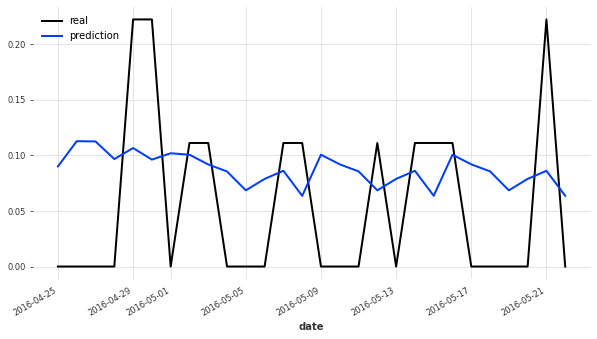

In [ ]:
plt.figure(figsize=(10,5))
test.univariate_component(43).plot(label="real")
nbeats_forecast.univariate_component(43).plot(label="prediction")

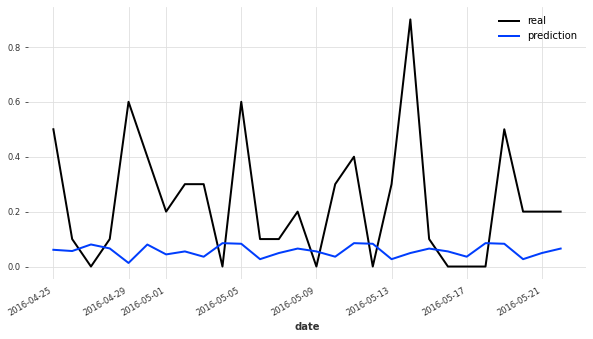

In [ ]:
plt.figure(figsize=(10,5))
test.univariate_component(4567).plot(label="real")
nbeats_forecast.univariate_component(4567).plot(label="prediction")

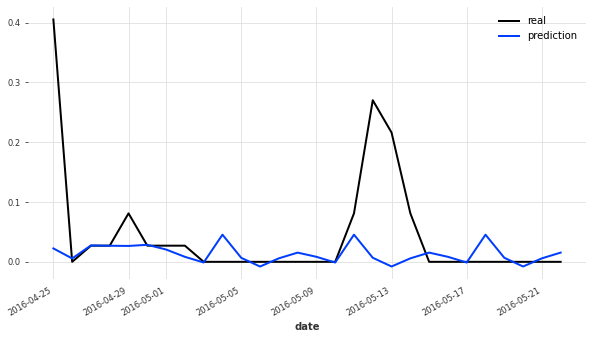

In [ ]:
plt.figure(figsize=(10,5))
test.univariate_component(7896).plot(label="real")
nbeats_forecast.univariate_component(7896).plot(label="prediction")

### Intento B: Modelo con mejor rendimiento 


Se realizaron los siguientes cambios para mejorar el rendimiento:

* Se modificó el hiperparámetro de `num_layers` a 8, que corresponde al número de covariables que el modelo emplea ahora: día de la semana, mes, año, feriado 1, feriado 2, snap_CA, snap_TX, snap_WI.

* Se agregó un Learning Rate de 3e-3 para tratar de acelerar el entrenamiento porque este tomaba bastante tiempo, como se mencionó en el intento A.

In [ ]:
my_stopper = EarlyStopping(
  monitor="val_loss",
  patience=20, 
  min_delta=0.002, # I CHANGED THE min delta FROM 0.003 TO 0.002
  mode='min',
)

In [ ]:
model_nbeats18 = NBEATSModel(
  input_chunk_length=7,   # Say we have a pattern repeated week after week, so we set this parameter to the model look back an entire week into the past
  output_chunk_length=7,  
  generic_architecture=True,
  num_stacks=10,
  num_blocks=1,
  num_layers=8,   # BECAUSE I ADDED 3 COVARIATES, 1 SNAP FOR EACH STATE: CA, TX, WI
  layer_widths=512,
  n_epochs=100,
  nr_epochs_val_period=1,  # This is the default value
  batch_size=32,  # Using the default value of 32
  save_checkpoints=True,
  loss_fn=torch.nn.L1Loss(), 
  torch_metrics=torchmetrics.MeanAbsoluteError(),  
  optimizer_kwargs={'lr': 3e-3},  # I CHANGED IT FROM 1e-3 TO 3e-3
  pl_trainer_kwargs={"callbacks": [my_stopper], "accelerator": "gpu", "devices": [0] },  # TO USE GPU'S
  force_reset=True,  # This allows the model to initialize from 0 and delete all the data it has accumulated during training
  model_name="nbeats_run18",
  )

In [ ]:
model_nbeats18.fit(series=rest, past_covariates=covT_t, val_series=test, val_past_covariates=covT_t)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | L1Loss           | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 1.1 B 
---------------------------------------------------
1.1 B     Trainable params
1.3 M     Non-trainable params
1.1 B     Total params
4,548.436 Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [ ]:
nbeats_forecast = model_nbeats18.predict(n=28, past_covariates=covT_t)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 60it [00:00, ?it/s]

In [ ]:
nbeats_forecast

<TimeSeries (DataArray) (date: 28, component: 30490, sample: 1)>
array([[[ 1.69901550e-02],
        [ 9.64105129e-05],
        [ 1.35969222e-02],
        ...,
        [ 2.33144462e-02],
        [ 2.35714465e-02],
        [ 3.87263447e-02]],

       [[ 5.00473380e-03],
        [-7.72172213e-03],
        [ 5.93666732e-03],
        ...,
        [ 2.12747902e-02],
        [ 1.32798851e-02],
        [ 1.56639814e-02]],

       [[ 5.12719154e-03],
        [-1.45517737e-02],
        [ 1.31601095e-03],
        ...,
...
        ...,
        [ 9.48253274e-03],
        [ 1.63906813e-02],
        [ 8.27011466e-03]],

       [[ 6.92522526e-03],
        [ 1.63266063e-03],
        [ 2.48543024e-02],
        ...,
        [-1.01650059e-02],
        [-2.06508413e-02],
        [ 4.70548868e-03]],

       [[ 3.10173631e-03],
        [ 1.00182295e-02],
        [ 1.19162798e-02],
        ...,
        [ 2.44936794e-02],
        [-3.47834826e-03],
        [ 4.46252525e-03]]], dtype=float32)
Coordinates:
  * date       (date) datetime64[ns] 2016-04-25 2016-04-26 ... 2016-05-22
  * component  (component) object 'HOBBIES_1_001_CA_1_evaluation' ... 'FOODS_...
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
test

<TimeSeries (DataArray) (date: 28, component: 30490, sample: 1)>
array([[[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.08333334],
        [0.        ]],

       [[0.        ],
        [0.2       ],
        [0.        ],
        ...,
        [0.        ],
        [0.25      ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.16666667],
        ...,
...
        ...,
        [0.05      ],
        [0.08333334],
        [0.16666667]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.08333334],
        [0.41666666]],

       [[0.2       ],
        [0.        ],
        [0.16666667],
        ...,
        [0.1       ],
        [0.        ],
        [0.08333334]]], dtype=float32)
Coordinates:
  * date       (date) datetime64[ns] 2016-04-25 2016-04-26 ... 2016-05-22
  * component  (component) object 'HOBBIES_1_001_CA_1_evaluation' ... 'FOODS_...
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
print( f"RMSE: {rmse(nbeats_forecast, test)}" )

RMSE: 0.14484690129756927


In [ ]:
print( f"R2_score: {r2_score(nbeats_forecast, test)}" )

R2_score: -239.06471437900407


Des-normalizando la predicción y valores reales

In [ ]:
nbeats_forecast_n = scaler.inverse_transform(nbeats_forecast)

In [ ]:
forecast_n = nbeats_forecast_n.pd_dataframe()

In [ ]:
forecast_n_t = forecast_n.transpose()
forecast_n_t   # Ventas predichos

date                           2016-04-25  2016-04-26  2016-04-27  2016-04-28  \
component                                                                       
HOBBIES_1_001_CA_1_evaluation        0.08        0.03        0.03        0.08   
HOBBIES_1_002_CA_1_evaluation        0.00       -0.04       -0.07        0.01   
HOBBIES_1_003_CA_1_evaluation        0.08        0.04        0.01        0.02   
HOBBIES_1_004_CA_1_evaluation        1.32        1.38        1.24        1.04   
HOBBIES_1_005_CA_1_evaluation        0.71        0.56        0.38        0.18   
...                                   ...         ...         ...         ...   
FOODS_3_823_WI_3_evaluation          0.05        0.24       -0.11        0.03   
FOODS_3_824_WI_3_evaluation          0.02        0.08       -0.08        0.17   
FOODS_3_825_WI_3_evaluation          0.47        0.43        0.26        0.61   
FOODS_3_826_WI_3_evaluation          0.28        0.16        0.12        0.12   
FOODS_3_827_WI_3_evaluation          0.46        0.19        0.06       -0.00   

date                           2016-04-29  2016-04-30  2016-05-01  2016-05-02  \
component                                                                       
HOBBIES_1_001_CA_1_evaluation       -0.01        0.05        0.03        0.15   
HOBBIES_1_002_CA_1_evaluation       -0.04       -0.00        0.03       -0.01   
HOBBIES_1_003_CA_1_evaluation        0.03        0.04        0.07        0.15   
HOBBIES_1_004_CA_1_evaluation        1.06        1.23        1.03        1.32   
HOBBIES_1_005_CA_1_evaluation        0.73        0.20        1.15        0.60   
...                                   ...         ...         ...         ...   
FOODS_3_823_WI_3_evaluation          0.12       -0.03        0.00        0.03   
FOODS_3_824_WI_3_evaluation         -0.08       -0.03        0.11        0.24   
FOODS_3_825_WI_3_evaluation          0.08       -0.21        0.74        0.19   
FOODS_3_826_WI_3_evaluation          0.03       -0.12        0.05        0.39   
FOODS_3_827_WI_3_evaluation          0.08       -0.01        0.02        0.57   

date                           2016-05-03  2016-05-04  ...  2016-05-13  \
component                                              ...               
HOBBIES_1_001_CA_1_evaluation        0.07        0.03  ...        0.08   
HOBBIES_1_002_CA_1_evaluation       -0.04       -0.01  ...        0.07   
HOBBIES_1_003_CA_1_evaluation        0.07        0.02  ...       -0.03   
HOBBIES_1_004_CA_1_evaluation        1.53        1.31  ...        0.98   
HOBBIES_1_005_CA_1_evaluation        0.58        0.46  ...        0.65   
...                                   ...         ...  ...         ...   
FOODS_3_823_WI_3_evaluation          0.30       -0.21  ...        0.26   
FOODS_3_824_WI_3_evaluation          0.02        0.06  ...       -0.13   
FOODS_3_825_WI_3_evaluation          0.36        0.13  ...        0.19   
FOODS_3_826_WI_3_evaluation          0.24        0.03  ...        0.20   
FOODS_3_827_WI_3_evaluation         -0.02        0.10  ...        0.10   

date                           2016-05-14  2016-05-15  2016-05-16  2016-05-17  \
component                                                                       
HOBBIES_1_001_CA_1_evaluation        0.03        0.02        0.15        0.07   
HOBBIES_1_002_CA_1_evaluation        0.01        0.05       -0.01       -0.04   
HOBBIES_1_003_CA_1_evaluation        0.15        0.07        0.15        0.07   
HOBBIES_1_004_CA_1_evaluation        1.09        1.09        1.32        1.53   
HOBBIES_1_005_CA_1_evaluation        0.16        1.31        0.60        0.58   
...                                   ...         ...         ...         ...   
FOODS_3_823_WI_3_evaluation         -0.03        0.07        0.03        0.30   
FOODS_3_824_WI_3_evaluation         -0.12        0.15        0.24        0.02   
FOODS_3_825_WI_3_evaluation         -0.20        0.49        0.19        0.36   
FOODS_3_826_WI_3_evaluation         -0

In [ ]:
test_n = scaler.inverse_transform(test)

In [ ]:
real_sales_n = test_n.pd_dataframe().transpose()
real_sales_n   # Ventas reales

date                           2016-04-25  2016-04-26  2016-04-27  2016-04-28  \
component                                                                       
HOBBIES_1_001_CA_1_evaluation        0.00        0.00        0.00        2.00   
HOBBIES_1_002_CA_1_evaluation        0.00        1.00        0.00        0.00   
HOBBIES_1_003_CA_1_evaluation        0.00        0.00        1.00        1.00   
HOBBIES_1_004_CA_1_evaluation        0.00        0.00        1.00        2.00   
HOBBIES_1_005_CA_1_evaluation        1.00        0.00        2.00        3.00   
...                                   ...         ...         ...         ...   
FOODS_3_823_WI_3_evaluation          0.00        0.00        0.00        2.00   
FOODS_3_824_WI_3_evaluation          0.00        1.00        1.00        1.00   
FOODS_3_825_WI_3_evaluation          0.00        0.00        1.00        1.00   
FOODS_3_826_WI_3_evaluation          1.00        3.00        0.00        1.00   
FOODS_3_827_WI_3_evaluation          0.00        0.00        0.00        0.00   

date                           2016-04-29  2016-04-30  2016-05-01  2016-05-02  \
component                                                                       
HOBBIES_1_001_CA_1_evaluation        0.00        3.00        5.00        0.00   
HOBBIES_1_002_CA_1_evaluation        0.00        0.00        0.00        0.00   
HOBBIES_1_003_CA_1_evaluation        0.00        2.00        1.00        0.00   
HOBBIES_1_004_CA_1_evaluation        4.00        1.00        6.00        4.00   
HOBBIES_1_005_CA_1_evaluation        1.00        0.00        3.00        2.00   
...                                   ...         ...         ...         ...   
FOODS_3_823_WI_3_evaluation          2.00        0.00        0.00        0.00   
FOODS_3_824_WI_3_evaluation          0.00        0.00        0.00        0.00   
FOODS_3_825_WI_3_evaluation          0.00        2.00        1.00        1.00   
FOODS_3_826_WI_3_evaluation          2.00        1.00        0.00        2.00   
FOODS_3_827_WI_3_evaluation          0.00        1.00        1.00        1.00   

date                           2016-05-03  2016-05-04  ...  2016-05-13  \
component                                              ...               
HOBBIES_1_001_CA_1_evaluation        0.00        1.00  ...        2.00   
HOBBIES_1_002_CA_1_evaluation        0.00        1.00  ...        0.00   
HOBBIES_1_003_CA_1_evaluation        0.00        0.00  ...        1.00   
HOBBIES_1_004_CA_1_evaluation        0.00        0.00  ...        1.00   
HOBBIES_1_005_CA_1_evaluation        3.00        1.00  ...        0.00   
...                                   ...         ...  ...         ...   
FOODS_3_823_WI_3_evaluation          2.00        0.00  ...        1.00   
FOODS_3_824_WI_3_evaluation          1.00        0.00  ...        0.00   
FOODS_3_825_WI_3_evaluation          0.00        0.00  ...        0.00   
FOODS_3_826_WI_3_evaluation          1.00        1.00  ...        1.00   
FOODS_3_827_WI_3_evaluation          2.00        0.00  ...        1.00   

date                           2016-05-14  2016-05-15  2016-05-16  2016-05-17  \
component                                                                       
HOBBIES_1_001_CA_1_evaluation        4.00        0.00        0.00        0.00   
HOBBIES_1_002_CA_1_evaluation        1.00        2.00        1.00        1.00   
HOBBIES_1_003_CA_1_evaluation        0.00        2.00        0.00        0.00   
HOBBIES_1_004_CA_1_evaluation        1.00        0.00        4.00        0.00   
HOBBIES_1_005_CA_1_evaluation        0.00        0.00        2.00        1.00   
...                                   ...         ...         ...         ...   
FOODS_3_823_WI_3_evaluation          0.00        3.00        0.00        1.00   
FOODS_3_824_WI_3_evaluation          0.00        0.00        0.00        0.00   
FOODS_3_825_WI_3_evaluation          0.00        1.00        2.00        0.00   
FOODS_3_826_WI_3_evaluation          1

In [ ]:
print( f"RMSE: {rmse(nbeats_forecast_n, test_n)}" )

RMSE: 1.6544650793075562


El RMSE des-normalizado mejoró de 1.687 a 1.654

No se podía guardar el modelo porque decía que se ha superado la cuota de almacenamiento de Google Drive.
He visto que cada modelo pesa como 20GB.

In [ ]:
SAVE = "/NBEATS_per_item_LAST.pth.tar"
mpath = "/content/drive/MyDrive/IRN Project G1 2022" + SAVE
model_nbeats18.save(mpath)

In [ ]:
items_list = list(nbeats_forecast.components)

Text(0, 0.5, 'units sold')

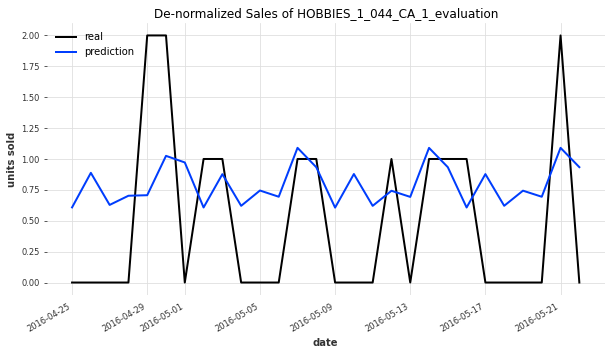

In [ ]:
plt.figure(figsize=(10,5))
test_n.univariate_component(43).plot(label="real")
nbeats_forecast_n.univariate_component(43).plot(label="prediction")
plt.title(f"De-normalized Sales of {items_list[43]}")
plt.ylabel("units sold")

Text(0, 0.5, 'units sold')

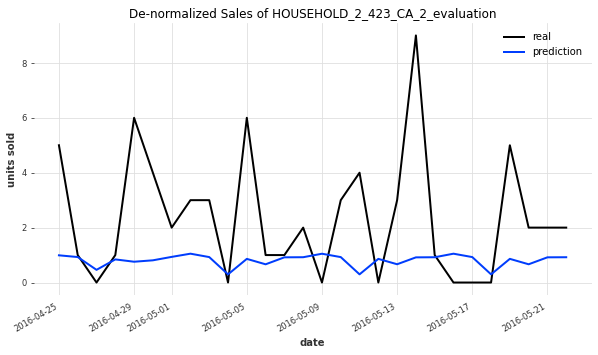

In [ ]:
plt.figure(figsize=(10,5))
test_n.univariate_component(4567).plot(label="real")
nbeats_forecast_n.univariate_component(4567).plot(label="prediction")
plt.title(f"De-normalized Sales of {items_list[4567]}")
plt.ylabel("units sold")

In [ ]:
data = stev.set_index('id')[stev_days_cols].T.merge(cal.set_index('d')['date'], left_index=True, right_index=True, validate='1:1').set_index('date')
cols = stev_days_cols.copy()
cols.append('id')
best_selling = stev[cols].copy()
best_selling['total_sales'] = stev[stev_days_cols].sum(axis=1)
best_selling = best_selling[['id', 'total_sales']].sort_values('total_sales', ascending=False)
bs_names = list(best_selling['id'][:5])  # Selecting the 5 best selling products

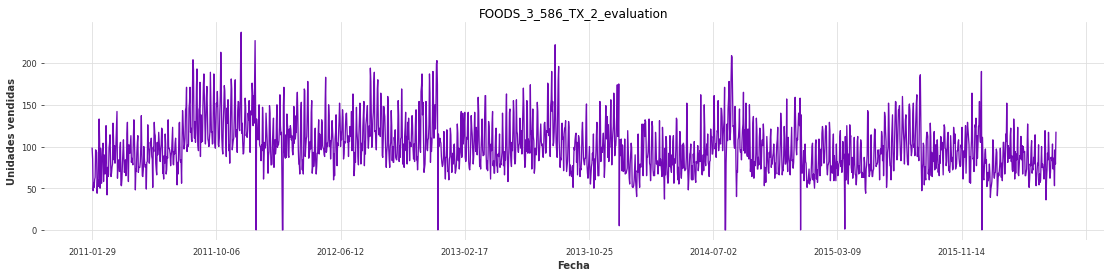

In [ ]:
item = np.random.choice(bs_names)
data[item].plot(title=item, figsize=(19,4), color='#7209b7')
plt.ylabel('Unidades vendidas')
plt.xlabel('Fecha')
plt.show()

In [ ]:
item

'FOODS_3_586_TX_2_evaluation'

In [ ]:
if item in items_list: 
  item_index = items_list.index(item)
  print(item_index)

18055


In [ ]:
data[item]

date
2011-01-29     98
2011-01-30     85
2011-01-31     47
2011-02-01     56
2011-02-02     51
             ... 
2016-05-18     76
2016-05-19     53
2016-05-20     96
2016-05-21     79
2016-05-22    117
Name: FOODS_3_586_TX_2_evaluation, Length: 1941, dtype: int64

In [ ]:
data_fh = data[item][1913:]
data_fh

date
2016-04-25     79
2016-04-26     75
2016-04-27     71
2016-04-28     61
2016-04-29     86
2016-04-30    119
2016-05-01     96
2016-05-02     36
2016-05-03     60
2016-05-04     72
2016-05-05     92
2016-05-06     84
2016-05-07    117
2016-05-08     96
2016-05-09     72
2016-05-10     62
2016-05-11     69
2016-05-12     87
2016-05-13     85
2016-05-14     83
2016-05-15    103
2016-05-16     73
2016-05-17     86
2016-05-18     76
2016-05-19     53
2016-05-20     96
2016-05-21     79
2016-05-22    117
Name: FOODS_3_586_TX_2_evaluation, dtype: int64

In [ ]:
data_fh.index

Index(['2016-04-25', '2016-04-26', '2016-04-27', '2016-04-28', '2016-04-29',
       '2016-04-30', '2016-05-01', '2016-05-02', '2016-05-03', '2016-05-04',
       '2016-05-05', '2016-05-06', '2016-05-07', '2016-05-08', '2016-05-09',
       '2016-05-10', '2016-05-11', '2016-05-12', '2016-05-13', '2016-05-14',
       '2016-05-15', '2016-05-16', '2016-05-17', '2016-05-18', '2016-05-19',
       '2016-05-20', '2016-05-21', '2016-05-22'],
      dtype='object', name='date')

In [ ]:
len(data_fh)

28

In [ ]:
nbeats_forecast_n.univariate_component(item_index).univariate_values()

array([103.089905,  95.02319 ,  94.5082  , 101.70363 ,  88.45422 ,
        98.07294 ,  96.23462 , 103.18802 ,  96.5772  ,  97.97947 ,
       102.2435  ,  89.276344,  97.959305,  96.67223 , 103.151054,
        96.56229 ,  97.933815, 102.238945,  89.21916 ,  97.95696 ,
        96.63965 , 103.18324 ,  96.569405,  97.98152 , 102.237206,
        89.25986 ,  97.96987 ,  96.66537 ], dtype=float32)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_fh.index, y=list(data_fh), mode="lines", name="full"))
fig.add_trace(go.Scatter(x=nbeats_forecast_n.time_index, y=nbeats_forecast_n.univariate_component(item_index).univariate_values(), mode="lines", name="forecast"))
fig.update_layout(title='Sale of a high selling product', xaxis_title="Date", yaxis_title="Number of sales")
fig.show()

## Conclusiones del rendimiento:
Las conclusiones a continuación se refieren principalmente al modelo de valor que predice las ventas individuales de cada uno de los 30 490 ítems:

* Estudiar e implementar primero un modelo simplificado, en este caso de predicción de ventas generales, permitió entender ampliamente el funcionamiento de modelo NBEATS, dar un idea de cuáles hiperparámetros pueden ser ideales para el modelo más complejo, además de que se ahorra tiempo de entrenamiento, poder computacional y reducir costos de experimentación.

* El hiperparámetro de `num_layers`, número de capas completamente conectadas, debe ser igual al número de covariables disponibles para optimizar el performance del modelo.

* El resultado de RMSE 0.14 del modelo de predcción de ventas individuales normalizadas y RMSE 1.65 de ventas individuales des-normalizadas todavía deja mucho espacio de mejora.

* Implementar la regularización de Early Stopping es de mucha utilidad pues permite reducir considerablemente el tiempo de entrenamiento al detenerlo cuando no hay una mejora significativa en el resultado de métrica de evaluación.


## Futura experimentación y mejoras:
Se realizarán las siguientes experimentaciones con el objetivo de mejorar el rendimiento del modelo de predicción de ventas individuales:

* Se puede incrementar el número de neuronas que conforman cada capa completamente conectada `layer_widths` (actualmente 512), esto basado en que ese era el número que se usó para el modelo de predicción de ventas generales, y debido a que el modelo de predicción de ventas individuales es más complejo dimensionalmente, se necesita mayores conexiones para poder procesar el conocimiento adecuadamente y mejorar el rendimiento. De hecho se intentó aumentar `layer_widths` a 600 pero las unidades informáticas disponibles se acabaron a durante el entrenamiento lo que pudo causar que el val loss resultada en 4.39e+19. Si fue causado por una explosión del gradiente se propone el siguiente punto.


* Se puede intentar utilizar la inicialización de los pesos He initialization (kaiming uniform initialization), debido a que en los intentos actuales se usó la función de activación ReLU. Esta inicialización toma en cuenta la no-linearidad de las funciones de activación de las variates de ReLU y mejora el rendimiento del modelo final con base en ello. Además esta inicialización es derivada de Xavier initialization, en donde los pesos son inicializados al multiplicarse por 2 veces la varianza de Xavier.

* Se puede aplicar una inicialización de los pesos como la de Xavier (normal), cambiar la función de activación de ReLU a Tanh ya que es una suposición que se emplea Tanh para usar Xavier initialization y evaluar si se mejora el performance del modelo o no.

* Se puede intentar trabajar con data estacionaria para predecir las ventas de cada uno de los 30 490 ítems. Luego para obtener un resultado más aproximado al que se tendría en la vida real, se le puede regresar la componente tendencial hallando la ecuación lineal que más se aproxima a las ventas históricas, además de agregar la componente irregular a través de la generación de valores aleatorios dentro de un rango especificado.

* Se puede modificar la función de pérdida a RMSE, esto para penalizar los grandes errores:
```
class RMSELoss(torch.nn.Module):
  def __init__(self, eps=1e-6):
    super().__init__()
    self.mse = torch.nn.MSELoss()
    self.eps = eps
  
  def foward(self, yhat, y):
    loss = sqrt(self.mse(yhat, y) + self.eps)
    return loss
```
Es necesario crear una clase de función de pérdida RMSE debido a que las librerias como Darts, PyTorch, Tensorflow no cuenta con una, esto porque se puede tener un problema al momento de calcular el gradiente de la raíz de un resultado del RMSE de 0, que resulta en NaN deteniendo el entrenamiento y actualización de los pesos al causar un error. Es por eso que en la clase RMSE propuesta arriba se suma un epsilon (eps) de 1e-6 para evitar el problema.

* Teniendo en cuenta que el modelo NBEATS tiene dos variantes: Genérica e Interpretable, es tentativo también implementar la variante Interpretable para proveer insights de qué covariables son las más importantes al momento de predecir las ventas.
  
* Complementando el punto sobre la Interpretación de los resultados del modelo Genérico, se plantea usar LIME (Local interpretable model-agnostic explanations), técnica en la cual, ya teniendo un resultado correctamente predicho, se realizan modificaciones en los atributos y covariables que ayudaron a predecirlo para ver en cómo influyen en este y así determinar su importancia para la predicción.

* Se puede migrar el modelo de NBEATS de la librería Darts a PyTorch Forecasting, explorar las variaciones entre ellas, evaluar las ventajas y desventajas, comparar performances de modelos iguales o similares para determinar cuál usar para futuros modelos de series de tiempo. 

* Se puede realizar un análisis del impacto económico que tendrían las predicciones tanto en dinero perdido por falta de stock, costo de inventario, merma, distribución, entre otros, además de tener el precio de los productos. Este análisis es altamente deseable para optimizar toda la cadena de suministro y maximizar las utilidades de la empresa. 

---

#Temporal Fusion Transformer

### Preprocesamiento de la data para el modelo

#### Covariables
Preprocesamiento de las covariables del modelo que ayudarán a predecir las ventas:

In [ ]:
holidays_names = cal[["date","event_name_1", "event_name_2"]]
holidays_names

date  event_name_1  event_name_2
0     2011-01-29           NaN           NaN
1     2011-01-30           NaN           NaN
2     2011-01-31           NaN           NaN
3     2011-02-01           NaN           NaN
4     2011-02-02           NaN           NaN
...          ...           ...           ...
1964  2016-06-15           NaN           NaN
1965  2016-06-16           NaN           NaN
1966  2016-06-17           NaN           NaN
1967  2016-06-18           NaN           NaN
1968  2016-06-19  NBAFinalsEnd  Father's day

[1969 rows x 3 columns]

In [ ]:
holidays_bi = holidays_names.fillna(0)
holidays_bi

date  event_name_1  event_name_2
0     2011-01-29             0             0
1     2011-01-30             0             0
2     2011-01-31             0             0
3     2011-02-01             0             0
4     2011-02-02             0             0
...          ...           ...           ...
1964  2016-06-15             0             0
1965  2016-06-16             0             0
1966  2016-06-17             0             0
1967  2016-06-18             0             0
1968  2016-06-19  NBAFinalsEnd  Father's day

[1969 rows x 3 columns]

In [ ]:
holidays_bi.loc[holidays_bi["event_name_1"] == 0].count()

date            1807
event_name_1    1807
event_name_2    1807
dtype: int64

In [ ]:
holidays_bi["event_name_1"].value_counts(dropna=False)

0                      1807
Pesach End                6
Ramadan starts            6
SuperBowl                 6
NBAFinalsEnd              6
NBAFinalsStart            6
MemorialDay               6
Mother's day              6
Purim End                 6
StPatricksDay             6
LentWeek2                 6
LentStart                 6
PresidentsDay             6
ValentinesDay             6
MartinLutherKingDay       5
OrthodoxChristmas         5
EidAlAdha                 5
NewYear                   5
Chanukah End              5
Christmas                 5
Thanksgiving              5
VeteransDay               5
Easter                    5
Halloween                 5
ColumbusDay               5
LaborDay                  5
Eid al-Fitr               5
IndependenceDay           5
Cinco De Mayo             5
OrthodoxEaster            5
Father's day              4
Name: event_name_1, dtype: int64

In [ ]:
holidays_bi1 = holidays_bi.replace(to_replace="[a-z]", value=1, regex=True)
holidays_bi1

date event_name_1 event_name_2
0     2011-01-29            0            0
1     2011-01-30            0            0
2     2011-01-31            0            0
3     2011-02-01            0            0
4     2011-02-02            0            0
...          ...          ...          ...
1964  2016-06-15            0            0
1965  2016-06-16            0            0
1966  2016-06-17            0            0
1967  2016-06-18            0            0
1968  2016-06-19            1            1

[1969 rows x 3 columns]

In [ ]:
hol_series = TimeSeries.from_dataframe(holidays_bi1, "date", ["event_name_1", "event_name_2"])
hol_series

<TimeSeries (DataArray) (date: 1969, component: 2, sample: 1)>
array([[[0.],
        [0.]],

       [[0.],
        [0.]],

       [[0.],
        [0.]],

       ...,

       [[0.],
        [0.]],

       [[0.],
        [0.]],

       [[1.],
        [1.]]])
Coordinates:
  * date       (date) datetime64[ns] 2011-01-29 2011-01-30 ... 2016-06-19
  * component  (component) object 'event_name_1' 'event_name_2'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
hol_series = hol_series.drop_after(pd.Timestamp("2016-05-23"))
hol_series

<TimeSeries (DataArray) (date: 1941, component: 2, sample: 1)>
array([[[0.],
        [0.]],

       [[0.],
        [0.]],

       [[0.],
        [0.]],

       ...,

       [[0.],
        [0.]],

       [[0.],
        [0.]],

       [[0.],
        [0.]]])
Coordinates:
  * date       (date) datetime64[ns] 2011-01-29 2011-01-30 ... 2016-05-22
  * component  (component) object 'event_name_1' 'event_name_2'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
covT = datetime_attribute_timeseries(past_sales_series.time_index, attribute="day_of_week")
covT = covT.stack(  datetime_attribute_timeseries(covT.time_index, attribute="month")  )
covT = covT.stack(  datetime_attribute_timeseries(covT.time_index, attribute="year") )
covT = covT.stack(hol_series)
covT = covT.astype(np.float32)
covT

<TimeSeries (DataArray) (date: 1941, component: 5, sample: 1)>
array([[[5.000e+00],
        [1.000e+00],
        [2.011e+03],
        [0.000e+00],
        [0.000e+00]],

       [[6.000e+00],
        [1.000e+00],
        [2.011e+03],
        [0.000e+00],
        [0.000e+00]],

       [[0.000e+00],
        [1.000e+00],
        [2.011e+03],
        [0.000e+00],
        [0.000e+00]],

       ...,

       [[4.000e+00],
        [5.000e+00],
        [2.016e+03],
        [0.000e+00],
        [0.000e+00]],

       [[5.000e+00],
        [5.000e+00],
        [2.016e+03],
        [0.000e+00],
        [0.000e+00]],

       [[6.000e+00],
        [5.000e+00],
        [2.016e+03],
        [0.000e+00],
        [0.000e+00]]], dtype=float32)
Coordinates:
  * date       (date) datetime64[ns] 2011-01-29 2011-01-30 ... 2016-05-22
  * component  (component) object 'day_of_week' 'month' ... 'event_name_2'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
pd.options.display.float_format = '{:.0f}'.format
print("first and last row of unscaled time covariates:")
covT.pd_dataframe().iloc[[0,-1]]

first and last row of unscaled time covariates:


component   day_of_week  month  year  event_name_1  event_name_2
date                                                            
2011-01-29            5      1  2011             0             0
2016-05-22            6      5  2016             0             0

Se procederá a usa MinxMax normalization para la data, es el tipo de normalización predeterminado de la clase Scaler() empleada a continuación:

In [ ]:
# train/test split
covT_train, covT_test = covT.split_after(pd.Timestamp('2016-04-24'))  # This is the 1st day of forecast horizon day 1913. We want to predict until 1941.

# rescale the covariates: fitting on the training set, values range from 0 to 1
scalerT = Scaler()
scalerT.fit(covT_train)
covT_ttrain = scalerT.transform(covT_train)  # we scale train set
covT_ttest = scalerT.transform(covT_test)    # we scale test set
covT_t = scalerT.transform(covT)             # we scale the whole set

covT_t = covT_t.astype(np.float32)
pd.options.display.float_format = '{:.2f}'.format
print("first and last row of scaled covariates, training + test set:")   # Note that he has also scaled the date time variables (day, week, year, etc.)
covT_t.pd_dataframe().iloc[[0,-1]]

first and last row of scaled covariates, training + test set:


component   day_of_week  month  year  event_name_1  event_name_2
date                                                            
2011-01-29         0.83   0.00  0.00          0.00          0.00
2016-05-22         1.00   0.36  1.00          0.00          0.00

#### Ventas históricas
Preprocesamiento de los históricos de ventas de los 30,490 productos o ítems:

In [ ]:
stev

id        item_id    dept_id   cat_id  \
0      HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1      HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2      HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3      HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
4      HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                              ...            ...        ...      ...   
30485    FOODS_3_823_WI_3_evaluation    FOODS_3_823    FOODS_3    FOODS   
30486    FOODS_3_824_WI_3_evaluation    FOODS_3_824    FOODS_3    FOODS   
30487    FOODS_3_825_WI_3_evaluation    FOODS_3_825    FOODS_3    FOODS   
30488    FOODS_3_826_WI_3_evaluation    FOODS_3_826    FOODS_3    FOODS   
30489    FOODS_3_827_WI_3_evaluation    FOODS_3_827    FOODS_3    FOODS   

      store_id state_id  d_1  d_2  d_3  d_4  ...  d_1932  d_1933  d_1934  \
0         CA_1       CA    0    0    0    0  ...       2       4       0   
1         CA_1       CA    0    0    0    0  ...       0       1       2   
2         CA_1       CA    0    0    0    0  ...       1       0       2   
3         CA_1       CA    0    0    0    0  ...       1       1       0   
4         CA_1       CA    0    0    0    0  ...       0       0       0   
...        ...      ...  ...  ...  ...  ...  ...     ...     ...     ...   
30485     WI_3       WI    0    0    2    2  ...       1       0       3   
30486     WI_3       WI    0    0    0    0  ...       0       0       0   
30487     WI_3       WI    0    6    0    2  ...       0       0       1   
30488     WI_3       WI    0    0    0    0  ...       1       1       1   
30489     WI_3       WI    0    0    0    0  ...       1       2       0   

       d_1935  d_1936  d_1937  d_1938  d_1939  d_1940  d_1941  
0           0       0       0       3       3       0       1  
1           1       1       0       0       0       0       0  
2           0       0       0       2       3       0       1  
3           4       0       1       3       0       2       6  
4           2       1       0       0       2       1       0  
...       ...     ...     ...     ...     ...     ...     ...  
30485       0       1       1       0       0       1       1  
30486       0       0       0       1       0       1       0  
30487       2       0       1       0       1       0       2  
30488       4       6       0       1       1       1       0  
30489       5       4       0       2       2       5       1  

[30490 rows x 1947 columns]

In [ ]:
stev_days_cols = [d for d in stev.columns if 'd_' in d] 
print(stev_days_cols)

['d_1', 'd_2', 'd_3', 'd_4', 'd_5', 'd_6', 'd_7', 'd_8', 'd_9', 'd_10', 'd_11', 'd_12', 'd_13', 'd_14', 'd_15', 'd_16', 'd_17', 'd_18', 'd_19', 'd_20', 'd_21', 'd_22', 'd_23', 'd_24', 'd_25', 'd_26', 'd_27', 'd_28', 'd_29', 'd_30', 'd_31', 'd_32', 'd_33', 'd_34', 'd_35', 'd_36', 'd_37', 'd_38', 'd_39', 'd_40', 'd_41', 'd_42', 'd_43', 'd_44', 'd_45', 'd_46', 'd_47', 'd_48', 'd_49', 'd_50', 'd_51', 'd_52', 'd_53', 'd_54', 'd_55', 'd_56', 'd_57', 'd_58', 'd_59', 'd_60', 'd_61', 'd_62', 'd_63', 'd_64', 'd_65', 'd_66', 'd_67', 'd_68', 'd_69', 'd_70', 'd_71', 'd_72', 'd_73', 'd_74', 'd_75', 'd_76', 'd_77', 'd_78', 'd_79', 'd_80', 'd_81', 'd_82', 'd_83', 'd_84', 'd_85', 'd_86', 'd_87', 'd_88', 'd_89', 'd_90', 'd_91', 'd_92', 'd_93', 'd_94', 'd_95', 'd_96', 'd_97', 'd_98', 'd_99', 'd_100', 'd_101', 'd_102', 'd_103', 'd_104', 'd_105', 'd_106', 'd_107', 'd_108', 'd_109', 'd_110', 'd_111', 'd_112', 'd_113', 'd_114', 'd_115', 'd_116', 'd_117', 'd_118', 'd_119', 'd_120', 'd_121', 'd_122', 'd_123', 

In [ ]:
len(stev_days_cols)

1941

In [ ]:
past_sales = stev.set_index('id')[stev_days_cols].T.merge(cal.set_index('d')['date'], left_index=True, right_index=True, validate='1:1').set_index('date')
past_sales

HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_002_CA_1_evaluation  \
date                                                                       
2011-01-29                              0                              0   
2011-01-30                              0                              0   
2011-01-31                              0                              0   
2011-02-01                              0                              0   
2011-02-02                              0                              0   
...                                   ...                            ...   
2016-05-18                              0                              0   
2016-05-19                              3                              0   
2016-05-20                              3                              0   
2016-05-21                              0                              0   
2016-05-22                              1                              0   

            HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_004_CA_1_evaluation  \
date                                                                       
2011-01-29                              0                              0   
2011-01-30                              0                              0   
2011-01-31                              0                              0   
2011-02-01                              0                              0   
2011-02-02                              0                              0   
...                                   ...                            ...   
2016-05-18                              0                              1   
2016-05-19                              2                              3   
2016-05-20                              3                              0   
2016-05-21                              0                              2   
2016-05-22                              1                              6   

            HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_006_CA_1_evaluation  \
date                                                                       
2011-01-29                              0                              0   
2011-01-30                              0                              0   
2011-01-31                              0                              0   
2011-02-01                              0                              0   
2011-02-02                              0                              0   
...                                   ...                            ...   
2016-05-18                              0                              0   
2016-05-19                              0                              0   
2016-05-20                              2                              5   
2016-05-21                              1                              2   
2016-05-22                              0                              0   

            HOBBIES_1_007_CA_1_evaluation  HOBBIES_1_008_CA_1_evaluation  \
date                                                                       
2011-01-29                              0                             12   
2011-01-30                              0                             15   
2011-01-31                              0                              0   
2011-02-01                              0                              0   
2011-02-02                              0                              0   
...                                   ...                            ...   
2016-05-18                              1                              5   
2016-05-19                              0                              4   
2016-05-20                              1                              1   
2016-05-21                              1                             40   
2016-05-22                              0                             32   

            HOBBIES_1_009_CA_1_evaluation  HOBBIES_1_010

In [ ]:
products_ids = past_sales.columns
products_ids 

Index(['HOBBIES_1_001_CA_1_evaluation', 'HOBBIES_1_002_CA_1_evaluation',
       'HOBBIES_1_003_CA_1_evaluation', 'HOBBIES_1_004_CA_1_evaluation',
       'HOBBIES_1_005_CA_1_evaluation', 'HOBBIES_1_006_CA_1_evaluation',
       'HOBBIES_1_007_CA_1_evaluation', 'HOBBIES_1_008_CA_1_evaluation',
       'HOBBIES_1_009_CA_1_evaluation', 'HOBBIES_1_010_CA_1_evaluation',
       ...
       'FOODS_3_818_WI_3_evaluation', 'FOODS_3_819_WI_3_evaluation',
       'FOODS_3_820_WI_3_evaluation', 'FOODS_3_821_WI_3_evaluation',
       'FOODS_3_822_WI_3_evaluation', 'FOODS_3_823_WI_3_evaluation',
       'FOODS_3_824_WI_3_evaluation', 'FOODS_3_825_WI_3_evaluation',
       'FOODS_3_826_WI_3_evaluation', 'FOODS_3_827_WI_3_evaluation'],
      dtype='object', length=30490)

In [ ]:
past_sales = past_sales.reset_index()
past_sales.head(1)

date  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_002_CA_1_evaluation  \
0  2011-01-29                              0                              0   

   HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_004_CA_1_evaluation  \
0                              0                              0   

   HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_006_CA_1_evaluation  \
0                              0                              0   

   HOBBIES_1_007_CA_1_evaluation  HOBBIES_1_008_CA_1_evaluation  \
0                              0                             12   

   HOBBIES_1_009_CA_1_evaluation  ...  FOODS_3_818_WI_3_evaluation  \
0                              2  ...                            0   

   FOODS_3_819_WI_3_evaluation  FOODS_3_820_WI_3_evaluation  \
0                           14                            1   

   FOODS_3_821_WI_3_evaluation  FOODS_3_822_WI_3_evaluation  \
0                            0                            4   

   FOODS_3_823_WI_3_evaluation  FOODS_3_824_WI_3_evaluation  \
0                            0                            0   

   FOODS_3_825_WI_3_evaluation  FOODS_3_826_WI_3_evaluation  \
0                            0                            0   

   FOODS_3_827_WI_3_evaluation  
0                            0  

[1 rows x 30491 columns]

This series contain all the normalized sales of the 30490 products, up until the last day of FH:

In [ ]:
scaler = Scaler()      # This is a normalization to scale all the values from 0 to 1
past_sales_series = scaler.fit_transform( TimeSeries.from_dataframe(past_sales, "date", products_ids )).astype(np.float32)
past_sales_series     # This series contain all the sales of the 30490 products, up until the last day of FH

<TimeSeries (DataArray) (date: 1941, component: 30490, sample: 1)>
array([[[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.3       ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
...
        ...,
        [0.05      ],
        [0.08333334],
        [0.16666667]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.08333334],
        [0.41666666]],

       [[0.2       ],
        [0.        ],
        [0.16666667],
        ...,
        [0.1       ],
        [0.        ],
        [0.08333334]]], dtype=float32)
Coordinates:
  * date       (date) datetime64[ns] 2011-01-29 2011-01-30 ... 2016-05-22
  * component  (component) object 'HOBBIES_1_001_CA_1_evaluation' ... 'FOODS_...
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

### Split del dataset

In [ ]:
rest, test = past_sales_series.split_after(pd.Timestamp('2016-04-24'))  # This is the 1st day of forecast horizon day 1913. We want to predict until 1941.

In [ ]:
rest

<TimeSeries (DataArray) (date: 1913, component: 30490, sample: 1)>
array([[[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.3       ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
...
        ...,
        [0.        ],
        [0.25      ],
        [0.        ]],

       [[0.2       ],
        [0.        ],
        [0.16666667],
        ...,
        [0.05      ],
        [0.08333334],
        [0.        ]],

       [[0.2       ],
        [0.        ],
        [0.16666667],
        ...,
        [0.        ],
        [0.25      ],
        [0.        ]]], dtype=float32)
Coordinates:
  * date       (date) datetime64[ns] 2011-01-29 2011-01-30 ... 2016-04-24
  * component  (component) object 'HOBBIES_1_001_CA_1_evaluation' ... 'FOODS_...
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

## Entrenamiento

In [ ]:
import torch.nn
import torchmetrics
from torch import sqrt

In [ ]:
# before starting, we define some constants
num_samples = 200

figsize = (9, 6)
lowest_q, low_q, high_q, highest_q = 0.01, 0.1, 0.9, 0.99
label_q_outer = f"{int(lowest_q * 100)}-{int(highest_q * 100)}th percentiles"
label_q_inner = f"{int(low_q * 100)}-{int(high_q * 100)}th percentiles"

In [ ]:
my_stopper = EarlyStopping(
  monitor="train_loss",  # I CHANGED IT FROM "val_loss", because when training it said there was no "val_loss" available.
  patience=10,  # I CHANGED THE PATIENCE TO 10 EPOCHS 
  min_delta=0.005, # I CHANGED THE min delta to 0.005
  mode='min',
)

In [ ]:
# default quantiles for QuantileRegression
quantiles = [
    0.01,
    0.05,
    0.1,
    0.15,
    0.2,
    0.25,
    0.3,
    0.4,
    0.5,
    0.6,
    0.7,
    0.75,
    0.8,
    0.85,
    0.9,
    0.95,
    0.99,
]

TFT_model = TFTModel(
  input_chunk_length=7,
  output_chunk_length=7,
  hidden_size=64,
  lstm_layers=1,
  num_attention_heads=4,
  # dropout=0.1,
  batch_size=64,
  n_epochs=100,
  add_relative_index=False,
  add_encoders=None,
  save_checkpoints=True,
  optimizer_kwargs={'lr': 0.05},  # I ADDED IT BECAUSE THE TRAINING TAKE TOO MUCH
  likelihood=QuantileRegression(quantiles=quantiles),  # QuantileRegression is set per default
  # loss_fn=MSELoss(),
  pl_trainer_kwargs={"callbacks": [my_stopper], "accelerator": "gpu", "devices": [0] },  #  TO USE THE GPU available
  force_reset=True,  # This allows the model to initialize from 0 and delete all the data it has accumulated during training
  model_name="TFT",
)

In [ ]:
TFT_model.fit(series=rest, past_covariates=covT_t, future_covariates=covT_t, verbose=True)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
   | Name                              | Type                             | Params
----------------------------------------------------------------------------------------
0  | train_metrics                     | MetricCollection                 | 0     
1  | val_metrics                       | MetricCollection                 | 0     
2  | input_embeddings                  | _MultiEmbedding                  | 0     
3  | static_covariates_vsn             | _VariableSelectionNetwork        | 0     
4  | encoder_vsn                       | 

Training: 0it [00:00, ?it/s]

/usr/local/lib/python3.8/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:368: UserWarning: `ModelCheckpoint(monitor='val_loss')` could not find the monitored key in the returned metrics: ['train_loss', 'epoch', 'step']. HINT: Did you call `log('val_loss', value)` in the `LightningModule`?
  warning_cache.warn(m)
/usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/call.py:48: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


Como se puede ver el Entrenamiento del modelo tuvo que ser interrumpido pues ya llevaba 4 horas, quedaban pocas unidades informáticas disponibles y solo iba por la 5ta época. A pesar de ello, el loss seguía disminuyendo, por lo que se puede inferir que si se tienen los recursos para que el modelo siga entrenando se puede lograr un muy buen resultado.

In [ ]:
# before starting, we define some constants
num_samples = 200

figsize = (9, 6)
lowest_q, low_q, high_q, highest_q = 0.01, 0.1, 0.9, 0.99
label_q_outer = f"{int(lowest_q * 100)}-{int(highest_q * 100)}th percentiles"
label_q_inner = f"{int(low_q * 100)}-{int(high_q * 100)}th percentiles"

In [ ]:
pred_series = TFT_model.predict(n=28, num_samples=200, past_covariates=covT_t, future_covariates=covT_t)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 3it [00:00, ?it/s]

In [ ]:
pred_series

<TimeSeries (DataArray) (date: 28, component: 30490, sample: 200)>
array([[[-1.07786134e-02, -2.42525176e-03,  1.84354931e-01, ...,
          1.41865730e-01,  2.88453192e-01,  1.83767438e-01],
        [-1.01798043e-01, -3.24831493e-02,  2.71946006e-03, ...,
         -6.18059747e-03,  2.64222198e-03, -1.51523240e-02],
        [ 2.19676986e-01,  3.16302525e-04,  3.45495879e-03, ...,
          1.05917595e-01, -7.35789537e-04,  1.51470572e-01],
        ...,
        [-1.80360600e-02, -6.23246469e-03,  1.61441877e-01, ...,
          9.19312239e-03,  3.43356393e-02,  4.89420295e-02],
        [ 2.23888308e-02,  3.38920988e-02, -1.39210569e-02, ...,
         -1.38698258e-02, -1.71701424e-03,  4.73178849e-02],
        [ 2.32512709e-02, -1.45869683e-02,  1.02202058e-01, ...,
         -1.45759620e-02, -1.59860719e-02,  5.43182611e-01]],

       [[ 1.81116939e-01,  1.83279216e-02,  8.23526643e-04, ...,
         -1.88548584e-03, -5.13833575e-02,  8.83191451e-03],
        [ 1.17171466e-01,  7.93181884e-04,  1.16493425e-03, ...,
          7.89233367e-04,  4.82120551e-03,  1.05922520e-02],
        [ 1.33668194e-02,  1.00882421e-03,  1.69171207e-03, ...,
         -1.11615874e-01,  3.77116492e-03,  1.88849028e-03],
...
          7.71854520e-02,  3.36954109e-02,  6.64083585e-02],
        [ 6.69678450e-02,  3.18596214e-02,  1.65895462e-01, ...,
         -1.03535131e-02,  6.29971735e-03, -3.34031973e-03],
        [ 9.38687194e-03,  2.68232785e-02,  1.77972108e-01, ...,
         -1.33223701e-02,  6.12275302e-03,  1.17074195e-02]],

       [[ 4.88752425e-01,  1.28970183e-02, -3.09428968e-03, ...,
          6.48213476e-02, -1.93298329e-03,  6.87271031e-03],
        [ 1.70414988e-03,  1.70000941e-02,  6.36606244e-04, ...,
          9.08459350e-03,  6.77697510e-02,  2.58077937e-03],
        [ 1.21136308e-01,  3.17874886e-02, -1.66402366e-02, ...,
          2.01385375e-02,  6.21583313e-04, -2.38512512e-02],
        ...,
        [ 6.77849911e-03, -9.92416963e-03,  1.33494750e-01, ...,
          7.88637400e-02,  3.25483531e-02,  1.05479010e-03],
        [ 2.64286131e-01, -1.29157463e-02,  3.75809893e-03, ...,
          4.63485904e-03,  3.08020078e-02, -1.23027544e-02],
        [-6.17895927e-03,  8.99553951e-03, -1.41317528e-02, ...,
          6.16716519e-02,  1.19535569e-02,  3.37881073e-02]]],
      dtype=float32)
Coordinates:
  * date       (date) datetime64[ns] 2016-04-25 2016-04-26 ... 2016-05-22
  * component  (component) object 'HOBBIES_1_001_CA_1_evaluation' ... 'FOODS_...
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
items = list(pred_series.components)
index_high = items.index(item) # This "item" variable comes from the Normality test
sales_high = pred_series.univariate_component(index_high)
sales_high

<TimeSeries (DataArray) (date: 28, component: 1, sample: 200)>
array([[[0.3432555 , 0.37247956, 0.38464668, ..., 0.42515466,
         0.40314844, 0.3063106 ]],

       [[0.4174456 , 0.39398462, 0.41786504, ..., 0.44276422,
         0.31352848, 0.39794275]],

       [[0.42801633, 0.5928062 , 0.2539359 , ..., 0.5617311 ,
         0.45668834, 0.37066472]],

       ...,

       [[0.3654217 , 0.40206468, 0.3527552 , ..., 0.41553122,
         0.42733353, 0.46049094]],

       [[0.25058675, 0.43574563, 0.49388415, ..., 0.2466176 ,
         0.3520383 , 0.3432525 ]],

       [[0.3981419 , 0.39028028, 0.31423563, ..., 0.518244  ,
         0.19183798, 0.22537836]]], dtype=float32)
Coordinates:
  * date       (date) datetime64[ns] 2016-04-25 2016-04-26 ... 2016-05-22
  * component  (component) object 'FOODS_3_586_TX_3_evaluation'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
past_sales_series.univariate_component(index_high)[: 1913]

<TimeSeries (DataArray) (date: 1913, component: 1, sample: 1)>
array([[[0.575]],

       [[0.58 ]],

       [[0.355]],

       ...,

       [[0.275]],

       [[0.33 ]],

       [[0.235]]], dtype=float32)
Coordinates:
  * date       (date) datetime64[ns] 2011-01-29 2011-01-30 ... 2016-04-24
  * component  (component) object 'FOODS_3_586_TX_3_evaluation'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
past_sales_series.univariate_component(index_high)[1913:]

<TimeSeries (DataArray) (date: 28, component: 1, sample: 1)>
array([[[0.29 ]],

       [[0.235]],

       [[0.29 ]],

       [[0.155]],

       [[0.33 ]],

       [[0.325]],

       [[0.46 ]],

       [[0.235]],

       [[0.35 ]],

       [[0.255]],

...

       [[0.395]],

       [[0.35 ]],

       [[0.44 ]],

       [[0.24 ]],

       [[0.255]],

       [[0.145]],

       [[0.195]],

       [[0.46 ]],

       [[0.415]],

       [[0.47 ]]], dtype=float32)
Coordinates:
  * date       (date) datetime64[ns] 2016-04-25 2016-04-26 ... 2016-05-22
  * component  (component) object 'FOODS_3_586_TX_3_evaluation'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
bs_names  # This list comes from the Normality tets

['FOODS_3_090_CA_3_evaluation',
 'FOODS_3_586_TX_2_evaluation',
 'FOODS_3_586_TX_3_evaluation',
 'FOODS_3_586_CA_3_evaluation',
 'FOODS_3_090_CA_1_evaluation']

Visualización desde unos días antes del forecast horizon de los 5 productos más vendidos:

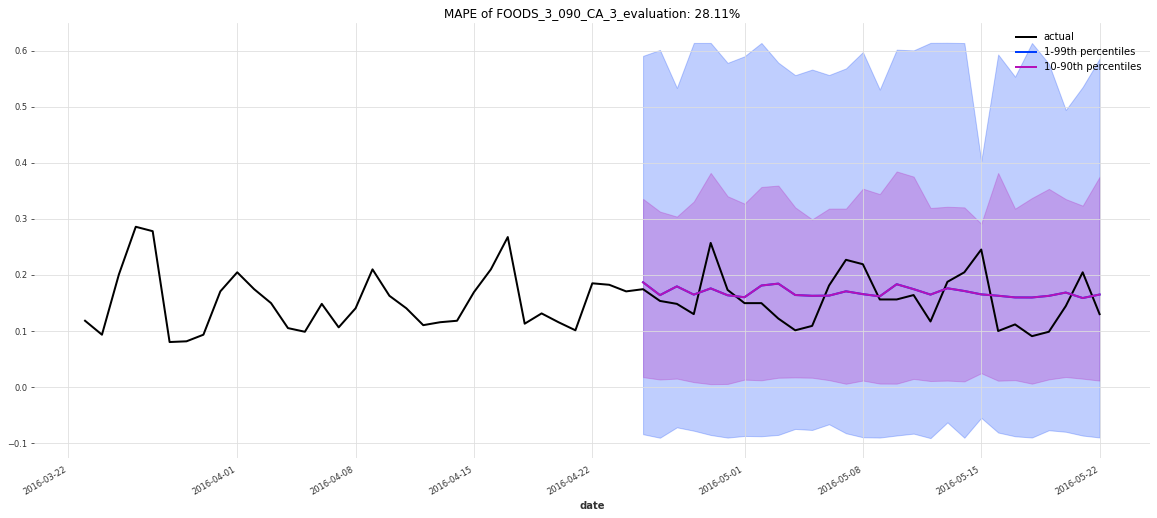

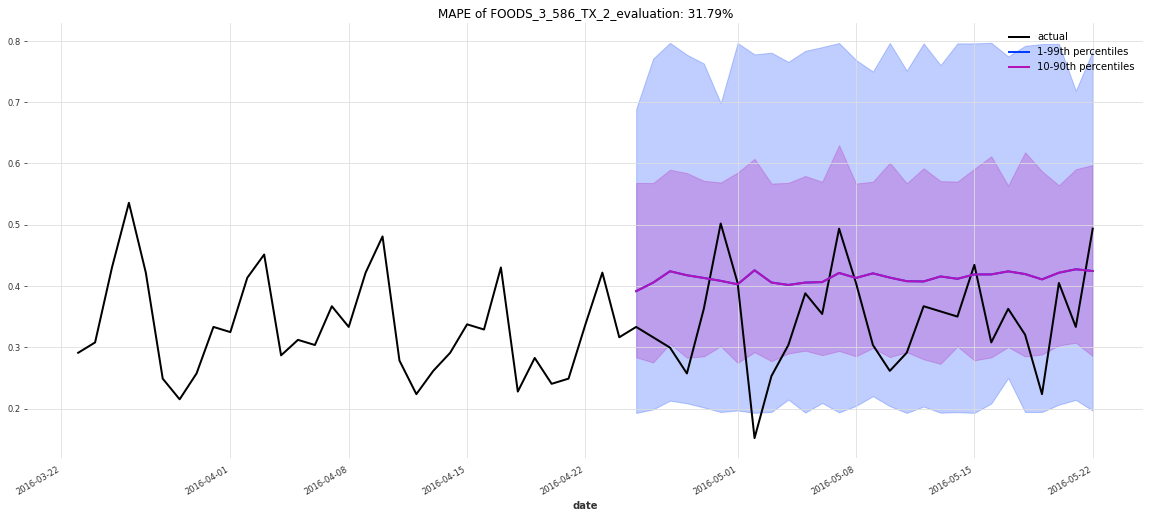

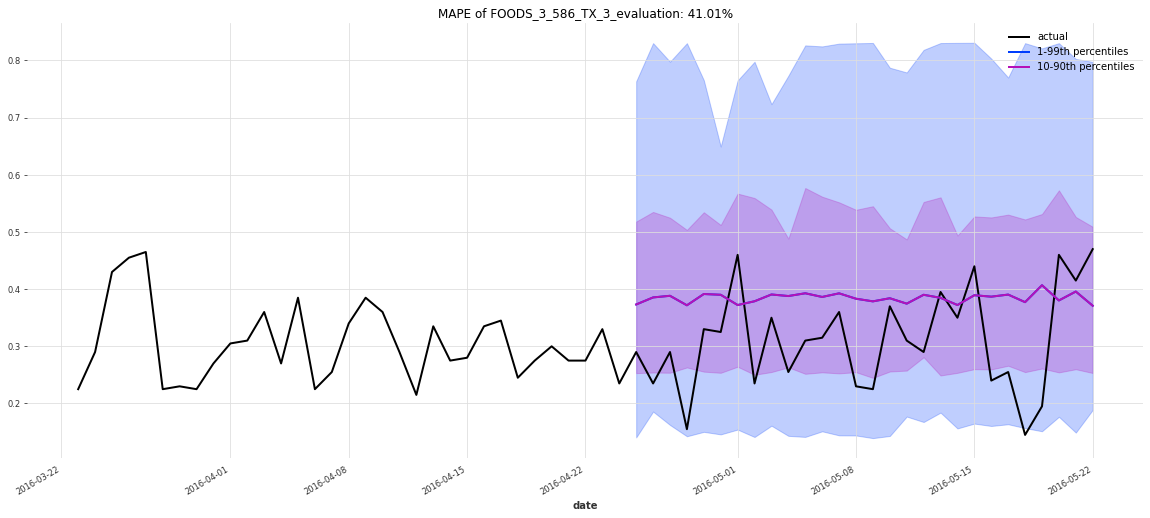

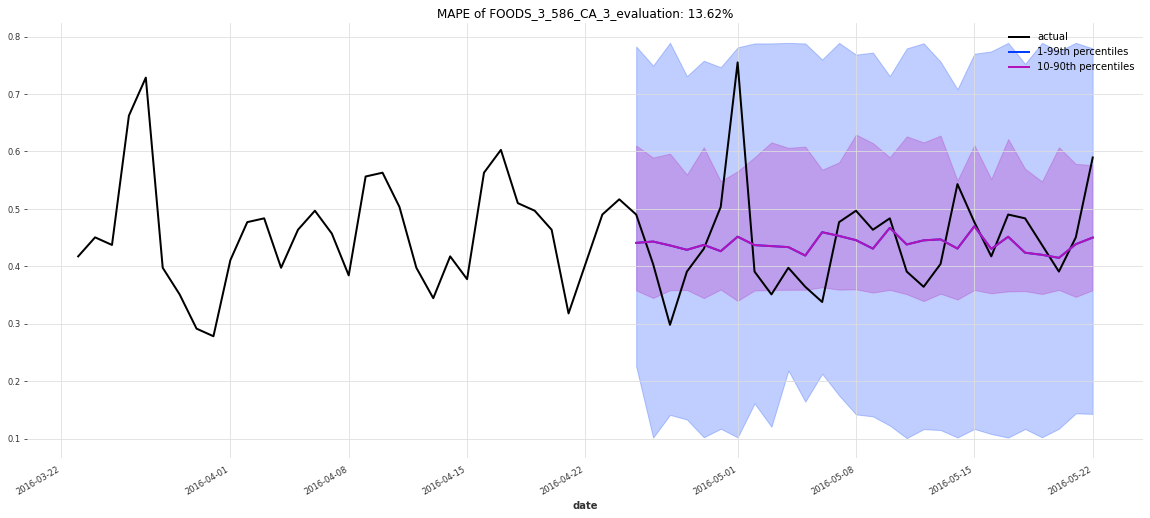

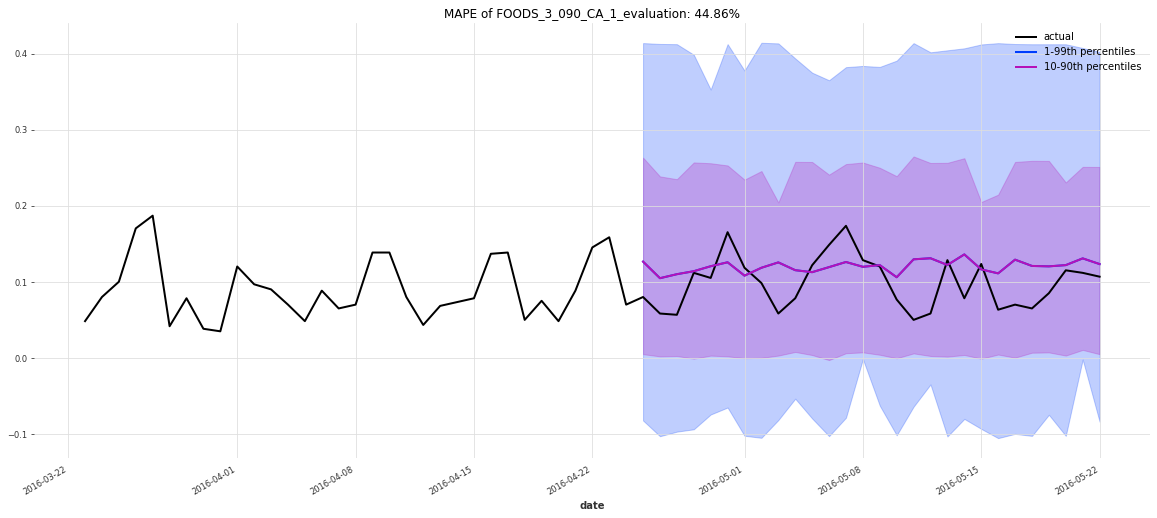

In [ ]:
for i in bs_names:
  index_high = items.index(i) # This "item" variable comes from the Normality test

  # plot actual series
  plt.figure(figsize=(20,8))
  past_sales_series.univariate_component(index_high)[1880:].plot(label="actual")

  # plot prediction with quantile ranges
  pred_series.univariate_component(index_high).plot(low_quantile=lowest_q, high_quantile=highest_q, label=label_q_outer)
  pred_series.univariate_component(index_high).plot(low_quantile=low_q, high_quantile=high_q, label=label_q_inner)

  plt.title(f"MAPE of {i}: { (mape(test.univariate_component(index_high), pred_series.univariate_component(index_high))):.2f}%")
  plt.legend()

Visualización de solo el forecast horizon de los 5 productos más vendidos:

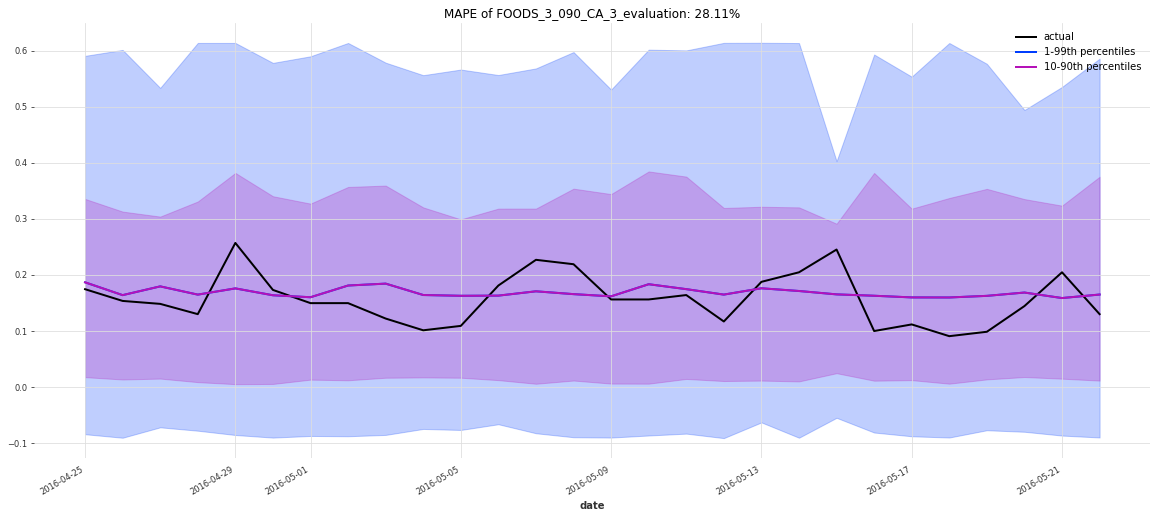

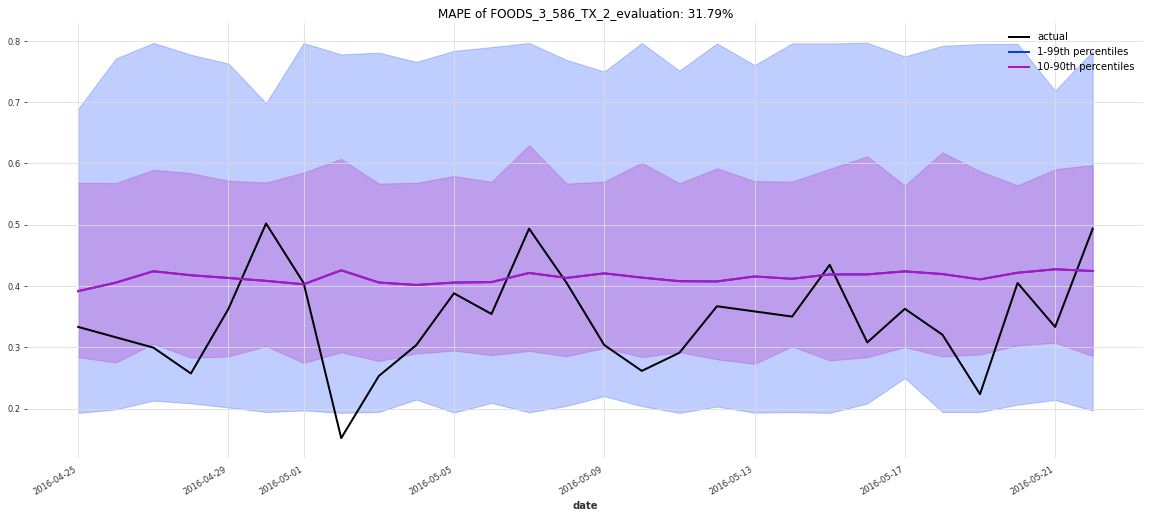

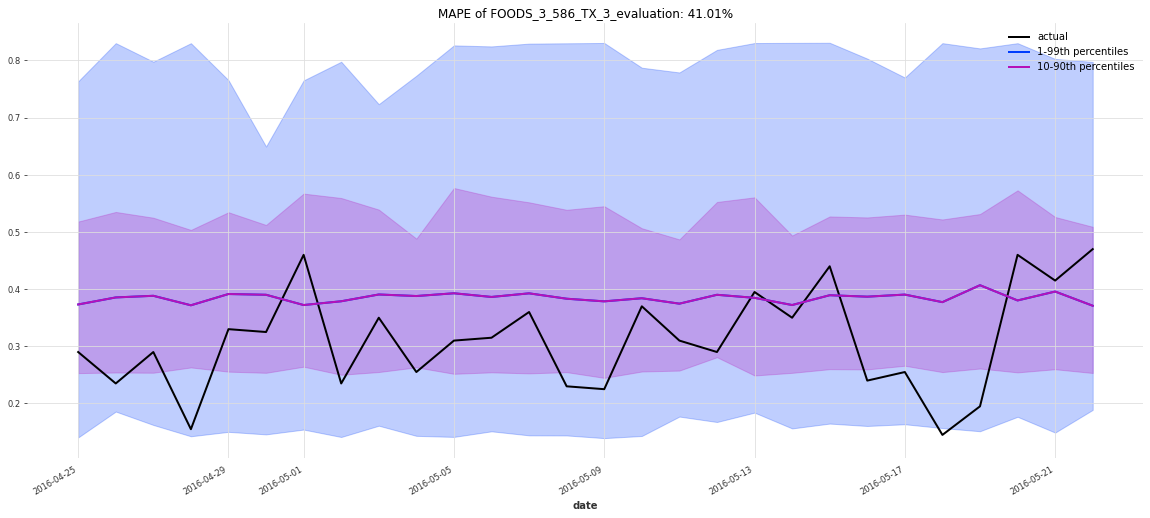

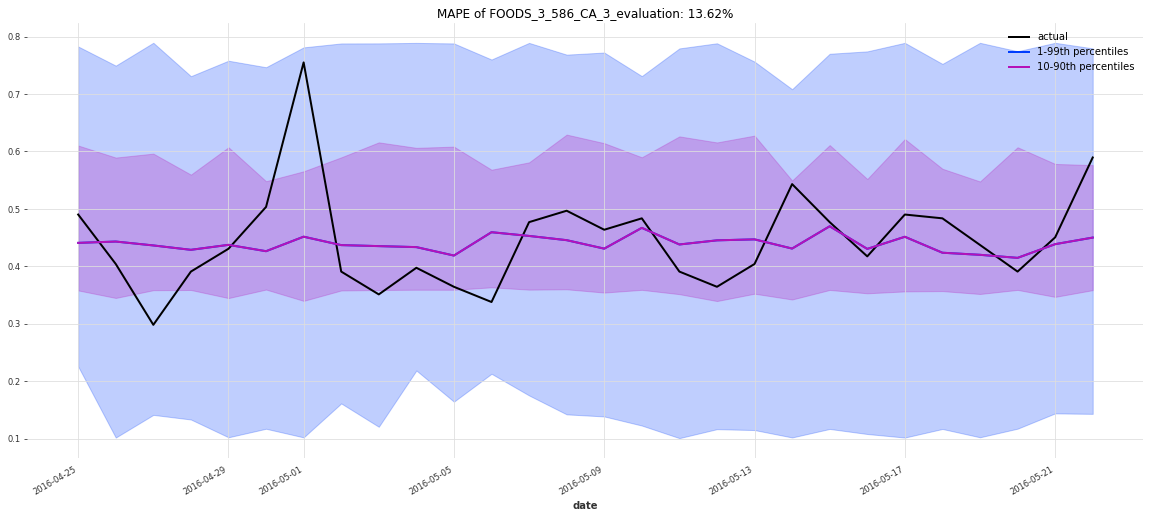

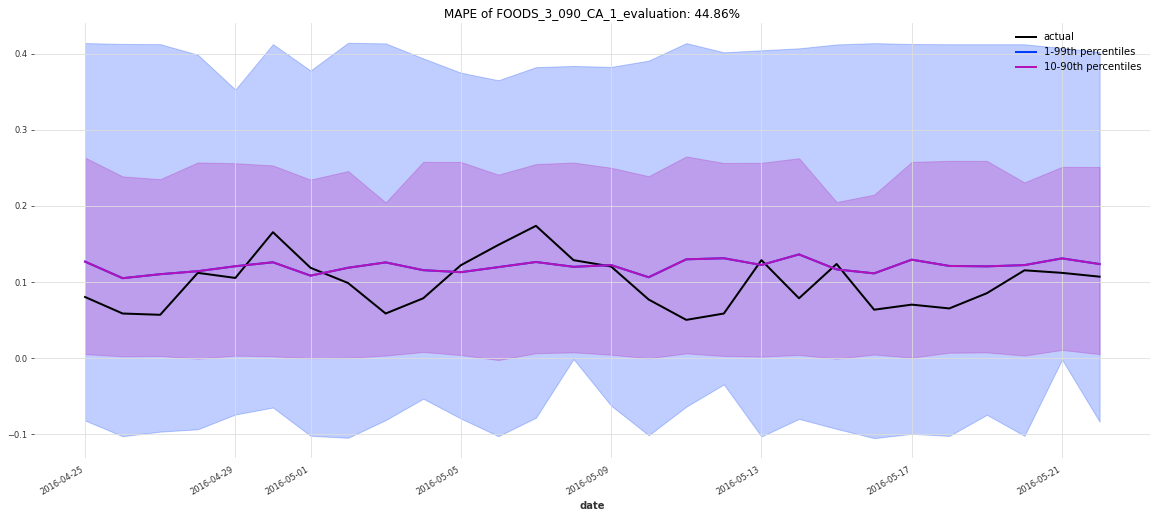

In [ ]:
for i in bs_names:
  index_high = items.index(i) # This "item" variable comes from the Normality test

  # plot actual series
  plt.figure(figsize=(20,8))
  past_sales_series.univariate_component(index_high)[1913:].plot(label="actual")

  # plot prediction with quantile ranges
  pred_series.univariate_component(index_high).plot(low_quantile=lowest_q, high_quantile=highest_q, label=label_q_outer)
  pred_series.univariate_component(index_high).plot(low_quantile=low_q, high_quantile=high_q, label=label_q_inner)

  plt.title(f"MAPE of {i}: { (mape(test.univariate_component(index_high), pred_series.univariate_component(index_high))):.2f}%")
  plt.legend()

#### Ejemplos correctamente predichos
Si se ven los gráficos expuestos arriba se clasifican:
* **Ejemplos correctamente predichos:** Serían las ventas predichas que tienen una alta probabilidad de estar lo más cerca posible de las ventas reales de los ítems. 
* **Ejemplos incorrectamente predichos:** Son los demás valores de venta predichos que tienen una probabilidad de ser un poco más lejanos a los reales.

## Conclusiones del rendimiento:

* Al tratarse de un modelo complejo y State-of-the-Art, que según los papers y artículos tienen muy buenos resultados comparados con otros modelos de predicción de series de tiempo y herramientas estadísticas, se necesita de mucho poder computacional (potentes GPU o TPU) para realizar el entrenamiento. En nuestro caso tomó 4 horas para entrenar hasta 5ta época; a pesar de ello, el loss seguía disminuyendo, por lo que se puede inferir que si se tienen los recursos para que el modelo siga entrenando se puede lograr un muy buen resultado.

* El objetivo de la variante probabilística de TFT es ajustar (narrow) las probabilidades de que una predicción sea lo más cerca a las ventas reales. En nuestro caso, algunos de los productos llegaron a tener un MAPE de 28.11%, lo cual todavía deja mucho espacio para mejorar a través de la experimentación.

* A momento de la presentación del entregable, el modelo NBEATS tiene un mejor rendimiento que el modelo Temporal Fusion Transformer, esto también debido a la poca experimentación que se pudo realizar con TFT debido a su amplio tiempo de entrenamiento, lo cual fue una de las limitantes.


## Futura experimentación:
* Se plantea usar el modelo de Temporal Fusion Transformer de Pytorch Forecasting, para aprovechar la ventaja de que facilita la implementación del software framework de [**Optuna**](https://optuna.org/), el cual automatiza la optimización de hiperparámetros de los modelos de machine learning (**Auto ML**).

* Se puede modificar la función de activación a emplear a ReLU, ReGLU, GELU; sin embargo se menciona que es preferible usar la activación propuesta y predeterminada para el modelo de Temporal Fusion Transformer: FeedForward Network - “GatedResidualNetwork”.

* Se puede implementar Drop out, experimentando sistemáticamente, de valores pequeños a grandes, para ver si se mejora el rendimiento del modelo, al foverecer la generalización del conocimiento importante entre las neuronas del modelo.

* Se puede incrementar el valor del Learning Rate, ya que el modelo TFT toma mucho tiempo entrenar, aumentar este valor puede acelerar el proceso, reducir las unidades informáticas empleadas y disminuir el costo de experimentación.

* En la librería Darts, el modelo Temporal Fusion Transformer también tiene una variante de predicción determinística y no solo probabilística, por ende es tentativo evaluar la utilidad y el performance de ambas variantes.





# Bibliografía

1. Oreshkin Boris N., Carpov Dmitri, Chapados Nicolas, Bengio Yoshua (2019). N-BEATS: Neural basis expansion analysis for interpretable time series forecasting. arXiv. Recuperado de: https://doi.org/10.48550/arxiv.1905.10437
2. Lim, B., Arik, S. O., Loeff, N., & Pfister, T. (2019). Temporal fusion transformers for interpretable multi-horizon time series forecasting. arXiv [stat.ML]. https://doi.org/10.48550/ARXIV.1912.09363
3. JJ. (2016, marzo 23). MAE and RMSE — Which Metric is Better? Human in a Machine World. https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d
4. Hodson, T. O. (2022). Root-mean-square error (RMSE) or mean absolute error (MAE): when to use them or not. Geoscientific Model Development, 15(14), 5481–5487. https://doi.org/10.5194/gmd-15-5481-2022
5. Guo, J. (s/f). AI Notes: Initializing neural networks. deeplearning.ai. Recuperado el 18 de diciembre de 2022, de https://www.deeplearning.ai/ai-notes/initialization/index.html
6. Section 4 (Week 4). (s/f). Stanford.edu. Recuperado el 18 de diciembre de 2022, de https://cs230.stanford.edu/section/4/
7. Temporal Fusion Transformer (TFT) — darts documentation. (s/f). Github.Io. Recuperado el 18 de diciembre de 2022, de https://unit8co.github.io/darts/generated_api/darts.models.forecasting.tft_model
8. N-BEATS — darts documentation. (s/f). Github.Io. Recuperado el 18 de diciembre de 2022, de https://unit8co.github.io/darts/generated_api/darts.models.forecasting.nbeats.html?highlight=nbeats
9. Yadav, H. (2022, julio 5). Dropout in neural networks. Towards Data Science. https://towardsdatascience.com/dropout-in-neural-networks-47a162d621d9
(S/f). Machinelearningmastery.com. Recuperado el 18 de diciembre de 2022, de https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/#:~:text=The%20default%20interpretation%20of%20the,is%20between%200.5%20and%200.8

10. He Kaiming, Zhang Xiangyu, Ren Shaoqing, Sun Jian (2015). Delving Deep into Rectifiers:
Surpassing Human-Level Performance on ImageNet Classification. arXiv. Recuperado de: 
https://doi.org/10.48550/arXiv.1502.01852 

11. Ribeiro Marco, Singh Sameer, Guestrin Carlos (2016). "Why Should I Trust You?": Explaining the Predictions of Any Classifier (LIME). arXiv. Recuperado de: 
https://doi.org/10.48550/arXiv.1602.04938  

# Apéndice

1. Notebook de experimentación de NBEATS para predicción de ventas generales e individuales: https://colab.research.google.com/drive/1E5z9X_GKyBSuEQaBFObrgRipd46Cvtr-?usp=sharing 

2. Notebook de experimentación NBEATS para predicción de ventas individuales (continuación): https://colab.research.google.com/drive/1zKBaPCvoDXE2iM5jDsfbqiPY8vW1oiVp?usp=sharing 

3. Automatic hyperparameter optimization software framework **Optuna** (implementado para modelos de PyTorch Forecasting): https://optuna.org/ 